# 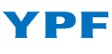
#   **Proyecto 4x4: Primer Pilar Vaca Muerta a corto plazo**  


El siguiente proyecto est√° focalizado en predecir el comportamiento de variables end√≥genas que impactan al actual modelo de YPF, en el marco del proyecto 4x4 de YPF. El proyecto consta en cuadriplicar el crecimiento de la empresa en los pr√≥ximos 4 a√±os a trav√©s de la expansi√≥n de la producci√≥n, eficiencia en los procesos y mayor foco en la generaci√≥n de valor.


El proyecto va a constar del siguiente procedimiento de an√°lisis:


1.  Recolecci√≥n de Datos
2.  Exploraci√≥n y Procesamiento de los datos (exploraci√≥n de los datos, discreci√≥n de variables, normalizaci√≥n, limpieza, visualizaci√≥n previa)
3.  Modelado (construir y testear modelos para predecir o clasificar informaci√≥n o encontrar patrones de datos)
4.  Puesta en Producci√≥n (predecir nuevos datos, comunicar los resultados, integrar los resultados con aplicaci√≥n)



# Recolecci√≥n de datos

Importo todas las libreras necesarias para la recolecci√≥n de datos y el an√°lisis exploratorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Este dataset que se incorpora es de producci√≥n de pozos de gas (Mm3) y petroleo (m3) no convencional, el mismo se obtuvo desde la p√°gina de Secretar√≠a de Energ√≠a (http://datos.energia.gob.ar/dataset/produccion-de-petroleo-y-gas-por-pozo/archivo)

In [ ]:
#Se utilizo la funci√≥n usecols para extraer las features mas reelevantes del dataset
produccion = pd.read_csv('/content/produccion.zip', usecols=['anio','mes','idpozo','empresa','tipopozo','tipoestado','prod_gas','prod_pet','profundidad','areayacimiento','cuenca','provincia','tipo_de_recurso','sub_tipo_recurso','prod_agua','tipoextraccion','profundidad','areapermisoconcesion','coordenadax','coordenaday','proyecto','clasificacion','subclasificacion'])
produccion

anio  mes  idpozo   prod_pet    prod_gas  prod_agua  \
0       2018    1  132488   0.000000  171.937000   0.000000   
1       2017    1  130021   0.000000  245.850000  16.680000   
2       2018    1  132487   0.000000  514.696000  17.000000   
3       2015    1  137212   0.000000  422.110000   0.000000   
4       2018    1  132361   0.000000  217.103000   7.300000   
...      ...  ...     ...        ...         ...        ...   
345377  2024   12    3640  14.049906   17.378994  72.385001   
345378  2023   12  164872   0.000000    0.000000   0.000000   
345379  2024   12  164374  60.960855  602.844409  63.852351   
345380  2024   12  164873   0.000000    0.000000   0.000000   
345381  2024   12  164503   0.000000    0.000000   0.000000   

           tipoextraccion               tipoestado     tipopozo  \
0       Surgencia Natural      Extracci√≥n Efectiva     Gas√≠fero   
1            Plunger Lift      Extracci√≥n Efectiva     Gas√≠fero   
2       Surgencia Natural      Extracci√≥n Efectiva     Gas√≠fero   
3         Bombeo Mec√°nico      Extracci√≥n Efectiva     Gas√≠fero   
4       Surgencia Natural      Extracci√≥n Efectiva     Gas√≠fero   
...                   ...                      ...          ...   
345377    Bombeo Mec√°nico      Extracci√≥n Efectiva  Petrol√≠fero   
345378                NaN                      NaN          NaN   
345379  Surgencia Natural      Extracci√≥n Efectiva  Petrol√≠fero   
345380  Surgencia Natural  Parado Transitoriamente     Gas√≠fero   
345381  Surgencia Natural  Parado Transitoriamente  Petrol√≠fero   

                                 empresa  ...             areayacimiento  \
0          YSUR ENERG√çA ARGENTINA S.R.L.  ...     ESTACION FERNANDEZ ORO   
1          YSUR ENERG√çA ARGENTINA S.R.L.  ...  ANTICLINAL CAMPAMENTO SUR   
2          YSUR ENERG√çA ARGENTINA S.R.L.  ...     ESTACION FERNANDEZ ORO   
3          YSUR ENERG√çA ARGENTINA S.R.L.  ...                    GUANACO   
4          YSUR ENERG√çA ARGENTINA S.R.L.  ...                    GUANACO   
...                                  ...  ...                        ...   
345377  Petrolera Aconcagua Energia S.A.  ...                 EL CARACOL   
345378  Petrolera Aconcagua Energia S.A.  ...                CHARCO BAYO   
345379  Petrolera Aconcagua Energia S.A.  ...                CHARCO BAYO   
345380  Petrolera Aconcagua Energia S.A.  ...                CHARCO BAYO   
345381  Petrolera Aconcagua Energia S.A.  ...                CHARCO BAYO   

          cuenca  provincia coordenadax coordenaday  tipo_de_recurso  \
0       NEUQUINA  Rio Negro  -67.864960  -39.016722  NO CONVENCIONAL   
1       NEUQUINA    Neuqu√©n  -69.733102  -39.024859  NO CONVENCIONAL   
2       NEUQUINA  Rio Negro  -67.837875  -39.019313  NO CONVENCIONAL   
3       NEUQUINA    Neuqu√©n  -69.255971  -38.860779  NO CONVENCIONAL   
4       NEUQUINA    Neuqu√©n  -69.231360  -38.869270  NO CONVENCIONAL   
...          ...        ...         ...         ...              ...   
345377  NEUQUINA    Neuqu√©n  -68.452390  -37.954170  NO CONVENCIONAL   
345378  NEUQUINA  Rio Negro  -68.099940  -38.174340  NO CONVENCIONAL   
345379  NEUQUINA  Rio Negro  -68.106619  -38.178494  NO CONVENCIONAL   
345380  NEUQUINA  Rio Negro  -68.129670  -38.149710  NO CONVENCIONAL   
345381  NEUQUINA  Rio Negro  -68.085408  -38.211980  NO CONVENCIONAL   

            proyecto clasificacion       subclasificacion sub_tipo_recurso  
0           GAS PLUS   EXPLOTACION             DESARROLLO            TIGHT  
1           GAS PLUS   EXPLOTACION             DESARROLLO            TIGHT  
2       Sin Proyecto   EXPLOTACION             DESARROLLO            TIGHT  
3           GAS PLUS   EXPLOTACION             DESARROLLO            TIGHT  
4           GAS PLUS   EXPLOTACION             DESARROLLO            TIGHT  
...              ...           ...                    ...              ...  
345377  Sin Proyecto   EXPLOTACION               AVANZADA            SHALE  
345378  Sin Proyecto   EX

En este paso, lo que realizamos es un filtro al dataset original para solo observar y analizar la informaci√≥n relacionada a la compa√±√≠a YPF S.A. en la cuenca Neuquina a partir del a√±o 2023 inclusive. Esta determinaci√≥n viene aparejado con la l√≠nea de pensamiento del actual CEO de la compa√±√≠a. Donde se tendr√° en consideraci√≥n como primer pilar para el crecimiento productivo la regi√≥n de Vaca Muerta, es decir, centrar el an√°lisis en la Cuenca Neuquina a partir del 2023, a√±o en que asume el actual CEO.

In [ ]:
#Filtro por cada dataset solo los registros para YPF S.A., para la cuenca Neuquina y a partir del a√±o 2023 inclusive
prod_ypf = produccion[(produccion['empresa'] == 'YPF S.A.')&(produccion['cuenca'] == 'NEUQUINA')&(produccion['anio']>2022)]

prod_ypf

anio  mes  idpozo  prod_pet  prod_gas  prod_agua  \
8572    2025    1  153522     32.29    172.10       0.00   
8578    2025    1  156742      0.00      0.00       0.00   
8584    2025    1  156744      0.00      0.00       0.00   
8590    2025    1  155827      0.00      0.00       0.00   
8596    2025    1  156756     55.99      3.37       0.00   
...      ...  ...     ...       ...       ...        ...   
199438  2024   12  166128      0.00      0.00       0.00   
199440  2024   12  166126   1642.63    101.18    1102.79   
199442  2024   12  166127   2441.10    153.31    1287.65   
199446  2024   12  166133      0.00      0.00       0.00   
199448  2024   12  166134      0.00      0.00       0.00   

                   tipoextraccion               tipoestado     tipopozo  \
8572                 Plunger Lift      Extracci√≥n Efectiva     Gas√≠fero   
8578            Surgencia Natural               Abandonado    Otro tipo   
8584              Bombeo Mec√°nico               En Estudio    Otro tipo   
8590            Surgencia Natural               Abandonado    Otro tipo   
8596            Surgencia Natural      Extracci√≥n Efectiva  Petrol√≠fero   
...                           ...                      ...          ...   
199438  Sin Sistema de Extracci√≥n    En Inyecci√≥n Efectiva     Sumidero   
199440          Surgencia Natural      Extracci√≥n Efectiva  Petrol√≠fero   
199442          Surgencia Natural      Extracci√≥n Efectiva  Petrol√≠fero   
199446          Surgencia Natural  Parado Transitoriamente     Gas√≠fero   
199448          Surgencia Natural  Parado Transitoriamente     Gas√≠fero   

         empresa  ...          areayacimiento    cuenca  provincia  \
8572    YPF S.A.  ...  ESTACION FERNANDEZ ORO  NEUQUINA  Rio Negro   
8578    YPF S.A.  ...              EL OREJANO  NEUQUINA    Neuqu√©n   
8584    YPF S.A.  ...         LA AMARGA CHICA  NEUQUINA    Neuqu√©n   
8590    YPF S.A.  ...              EL OREJANO  NEUQUINA    Neuqu√©n   
8596    YPF S.A.  ...            LOMA CAMPANA  NEUQUINA    Neuqu√©n   
...          ...  ...                     ...       ...        ...   
199438  YPF S.A.  ...           LOMA COLORADA  NEUQUINA    Neuqu√©n   
199440  YPF S.A.  ...           LOMA COLORADA  NEUQUINA    Neuqu√©n   
199442  YPF S.A.  ...           LOMA COLORADA  NEUQUINA    Neuqu√©n   
199446  YPF S.A.  ...             LAS TACANAS  NEUQUINA    Neuqu√©n   
199448  YPF S.A.  ...             LAS TACANAS  NEUQUINA    Neuqu√©n   

       coordenadax coordenaday  tipo_de_recurso      proyecto clasificacion  \
8572    -67.810843  -39.024083  NO CONVENCIONAL      GAS PLUS   EXPLOTACION   
8578    -69.179098  -38.009987  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8584    -68.748543  -38.176774  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8590    -69.200359  -37.958765  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8596    -68.678007  -38.329983  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
...            ...         ...              ...           ...           ...   
199438  -68.525949  -38.122077  NO CONVENCIONAL  Sin Proyecto      SERVICIO   
199440  -68.558082  -38.076855  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
199442  -68.558013  -38.076854  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
199446  -69.335181  -38.710951  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
199448  -69.335078  -38.710951  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   

       subclasificacion sub_tipo_recurso  
8572         DESARROLLO            TIGHT  
8578         DESARROLLO            SHALE  
8584         DESARROLLO            SHALE  
8590         DESARROLLO            SHALE  
8596         DESARROLLO            SHALE  
...                 ...              ...  
199438          CONTROL            SHALE  
199440       DESARROLLO            SHALE  
199442       DESARROLLO            SHALE  
199446       DESARROLLO            SHALE  
199448       DESARROLLO            SHALE  

[56418 rows x 22 columns]

In [ ]:
#Con rename se logr√≥ renombrar las columnas que ten√≠an nombres abreviados o poco legibles
prod_ypf=prod_ypf.rename(columns={'anio':'A√±o','mes':'Mes','idpozo':'ID pozo','prod_pet':'Produccion de Petroleo','prod_gas':'Produccion de Gas','prod_agua':'Produccion de agua','tipoextraccion':'Tipo de extraccion','tipoestado':'Tipo de estado','tipopozo':'Tipo de pozo','empresa':'Empresa','profundidad':'Profundidad','areapermisoconcesion':'Area de permiso de concesion','cuenca':'Cuenca','provincia':'Provincia','tipo_de_recurso':'Tipo de recurso','proyecto':'Proyecto','clasificacion':'Clasificacion','subclasificacion':'Subclasificacion','sub_tipo_recurso':'Subtipo de recurso'})
prod_ypf

A√±o  Mes  ID pozo  Produccion de Petroleo  Produccion de Gas  \
8572    2025    1   153522                   32.29             172.10   
8578    2025    1   156742                    0.00               0.00   
8584    2025    1   156744                    0.00               0.00   
8590    2025    1   155827                    0.00               0.00   
8596    2025    1   156756                   55.99               3.37   
...      ...  ...      ...                     ...                ...   
199438  2024   12   166128                    0.00               0.00   
199440  2024   12   166126                 1642.63             101.18   
199442  2024   12   166127                 2441.10             153.31   
199446  2024   12   166133                    0.00               0.00   
199448  2024   12   166134                    0.00               0.00   

        Produccion de agua         Tipo de extraccion  \
8572                  0.00               Plunger Lift   
8578                  0.00          Surgencia Natural   
8584                  0.00            Bombeo Mec√°nico   
8590                  0.00          Surgencia Natural   
8596                  0.00          Surgencia Natural   
...                    ...                        ...   
199438                0.00  Sin Sistema de Extracci√≥n   
199440             1102.79          Surgencia Natural   
199442             1287.65          Surgencia Natural   
199446                0.00          Surgencia Natural   
199448                0.00          Surgencia Natural   

                 Tipo de estado Tipo de pozo   Empresa  ...  \
8572        Extracci√≥n Efectiva     Gas√≠fero  YPF S.A.  ...   
8578                 Abandonado    Otro tipo  YPF S.A.  ...   
8584                 En Estudio    Otro tipo  YPF S.A.  ...   
8590                 Abandonado    Otro tipo  YPF S.A.  ...   
8596        Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   
...                         ...          ...       ...  ...   
199438    En Inyecci√≥n Efectiva     Sumidero  YPF S.A.  ...   
199440      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   
199442      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   
199446  Parado Transitoriamente     Gas√≠fero  YPF S.A.  ...   
199448  Parado Transitoriamente     Gas√≠fero  YPF S.A.  ...   

                areayacimiento    Cuenca  Provincia coordenadax coordenaday  \
8572    ESTACION FERNANDEZ ORO  NEUQUINA  Rio Negro  -67.810843  -39.024083   
8578                EL OREJANO  NEUQUINA    Neuqu√©n  -69.179098  -38.009987   
8584           LA AMARGA CHICA  NEUQUINA    Neuqu√©n  -68.748543  -38.176774   
8590                EL OREJANO  NEUQUINA    Neuqu√©n  -69.200359  -37.958765   
8596              LOMA CAMPANA  NEUQUINA    Neuqu√©n  -68.678007  -38.329983   
...                        ...       ...        ...         ...         ...   
199438           LOMA COLORADA  NEUQUINA    Neuqu√©n  -68.525949  -38.122077   
199440           LOMA COLORADA  NEUQUINA    Neuqu√©n  -68.558082  -38.076855   
199442           LOMA COLORADA  NEUQUINA    Neuqu√©n  -68.558013  -38.076854   
199446             LAS TACANAS  NEUQUINA    Neuqu√©n  -69.335181  -38.710951   
199448             LAS TACANAS  NEUQUINA    Neuqu√©n  -69.335078  -38.710951   

        Tipo de recurso      Proyecto Clasificacion Subclasificacion  \
8572    NO CONVENCIONAL      GAS PLUS   EXPLOTACION       DESARROLLO   
8578    NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
8584    NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
8590    NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
8596    NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
...                 ...           ...           ...              ...   
199438  NO CONVENCIONAL  Sin Proyecto      SERVICIO          CONTROL   
199440  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   
199442  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO  

# An√°lisis exploratorio de datos

In [ ]:
#Vamos a ver que tipo de estructura tiene prod_ypf
type(prod_ypf)

pandas.core.frame.DataFrame

In [ ]:
#Con la funci√≥n shape podemos ver cuantas features y registros contiene el dataframe prod_ypf
prod_ypf.shape

(56418, 22)

In [ ]:
#Con la funci√≥n columns puedo visualizar los nombres de los features
prod_ypf.columns

Index(['A√±o', 'Mes', 'ID pozo', 'Produccion de Petroleo', 'Produccion de Gas',
       'Produccion de agua', 'Tipo de extraccion', 'Tipo de estado',
       'Tipo de pozo', 'Empresa', 'Profundidad',
       'Area de permiso de concesion', 'areayacimiento', 'Cuenca', 'Provincia',
       'coordenadax', 'coordenaday', 'Tipo de recurso', 'Proyecto',
       'Clasificacion', 'Subclasificacion', 'Subtipo de recurso'],
      dtype='object')

In [ ]:
#A trav√©s de la funci√≥n head() puedo visualizar los primeros 5 registros
prod_ypf.head()

A√±o  Mes  ID pozo  Produccion de Petroleo  Produccion de Gas  \
8572  2025    1   153522                   32.29             172.10   
8578  2025    1   156742                    0.00               0.00   
8584  2025    1   156744                    0.00               0.00   
8590  2025    1   155827                    0.00               0.00   
8596  2025    1   156756                   55.99               3.37   

      Produccion de agua Tipo de extraccion       Tipo de estado Tipo de pozo  \
8572                 0.0       Plunger Lift  Extracci√≥n Efectiva     Gas√≠fero   
8578                 0.0  Surgencia Natural           Abandonado    Otro tipo   
8584                 0.0    Bombeo Mec√°nico           En Estudio    Otro tipo   
8590                 0.0  Surgencia Natural           Abandonado    Otro tipo   
8596                 0.0  Surgencia Natural  Extracci√≥n Efectiva  Petrol√≠fero   

       Empresa  ...          areayacimiento    Cuenca  Provincia coordenadax  \
8572  YPF S.A.  ...  ESTACION FERNANDEZ ORO  NEUQUINA  Rio Negro  -67.810843   
8578  YPF S.A.  ...              EL OREJANO  NEUQUINA    Neuqu√©n  -69.179098   
8584  YPF S.A.  ...         LA AMARGA CHICA  NEUQUINA    Neuqu√©n  -68.748543   
8590  YPF S.A.  ...              EL OREJANO  NEUQUINA    Neuqu√©n  -69.200359   
8596  YPF S.A.  ...            LOMA CAMPANA  NEUQUINA    Neuqu√©n  -68.678007   

     coordenaday  Tipo de recurso      Proyecto Clasificacion  \
8572  -39.024083  NO CONVENCIONAL      GAS PLUS   EXPLOTACION   
8578  -38.009987  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8584  -38.176774  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8590  -37.958765  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8596  -38.329983  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   

     Subclasificacion Subtipo de recurso  
8572       DESARROLLO              TIGHT  
8578       DESARROLLO              SHALE  
8584       DESARROLLO              SHALE  
8590       DESARROLLO              SHALE  
8596       DESARROLLO              SHALE  

[5 rows x 22 columns]

In [ ]:
# Mientras que con la funci√≥n tail(15) puedo visualizar los √∫ltimos 15 registros del dataframe
prod_ypf.tail(15)

A√±o  Mes  ID pozo  Produccion de Petroleo  Produccion de Gas  \
199418  2024   12   165787                 3409.13             645.07   
199420  2024   12   166130                    5.33               4.13   
199422  2024   12   165795                  570.73             166.81   
199424  2024   12   165791                 1523.42             445.38   
199426  2024   12   165794                 3054.73             987.58   
199428  2024   12   165792                 2967.65             980.35   
199430  2024   12   165793                 1775.53             542.29   
199432  2024   12   166129                    5.03               1.04   
199434  2024   12   166125                 3904.39             203.65   
199436  2024   12   166124                 2543.15             168.20   
199438  2024   12   166128                    0.00               0.00   
199440  2024   12   166126                 1642.63             101.18   
199442  2024   12   166127                 2441.10             153.31   
199446  2024   12   166133                    0.00               0.00   
199448  2024   12   166134                    0.00               0.00   

        Produccion de agua         Tipo de extraccion  \
199418             1584.58          Surgencia Natural   
199420              569.26          Surgencia Natural   
199422             1241.24          Surgencia Natural   
199424             2753.77          Surgencia Natural   
199426             2708.32          Surgencia Natural   
199428             2439.32          Surgencia Natural   
199430             2729.50          Surgencia Natural   
199432              403.62          Surgencia Natural   
199434              867.70          Surgencia Natural   
199436              950.83          Surgencia Natural   
199438                0.00  Sin Sistema de Extracci√≥n   
199440             1102.79          Surgencia Natural   
199442             1287.65          Surgencia Natural   
199446                0.00          Surgencia Natural   
199448                0.00          Surgencia Natural   

                 Tipo de estado Tipo de pozo   Empresa  ...  areayacimiento  \
199418      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199420      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199422      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199424      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199426      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199428      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199430      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199432      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   BANDURRIA SUR   
199434      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   LOMA COLORADA   
199436      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   LOMA COLORADA   
199438    En Inyecci√≥n Efectiva     Sumidero  YPF S.A.  ...   LOMA COLORADA   
199440      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   LOMA COLORADA   
199442      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.  ...   LOMA COLORADA   
199446  Parado Transitoriamente     Gas√≠fero  YPF S.A.  ...     LAS TACANAS   
199448  Parado Transitoriamente     Gas√≠fero  YPF S.A.  ...     LAS TACANAS   

          Cuenca Provincia coordenadax coordenaday  Tipo de recurso  \
199418  NEUQUINA   Neuqu√©n  -68.726359  -38.305617  NO CONVENCIONAL   
199420  NEUQUINA   Neuqu√©n  -68.880231  -38.238338  NO CONVENCIONAL   
199422  NEUQUINA   Neuqu√©n  -68.705510  -38.313932  NO CONVENCIONAL   
199424  NEUQUINA   Neuqu√©n  -68.705921  -38.313933  NO CONVENCIONAL   
199426  NEUQUINA   Neuqu√©n  -68.705614  -38.313932  NO CONVENCIONAL   
199428  NEUQUINA   Neuqu√©n  -68.705819  -38.313933  NO CONVENCIONAL   
199430  NEUQUINA   Neuqu√©n  -68.705716  -38.313933  NO CONVENCIONAL   
199432  NEUQUINA   Neuqu√©n  -68.880333  -38.238338  NO CO

In [ ]:
# Con dtypes podemos visualizar los tipos de datos que contiene cada feature (enteros, flotantes y objetos)
prod_ypf.dtypes

A√±o                               int64
Mes                               int64
ID pozo                           int64
Produccion de Petroleo          float64
Produccion de Gas               float64
Produccion de agua              float64
Tipo de extraccion               object
Tipo de estado                   object
Tipo de pozo                     object
Empresa                          object
Profundidad                     float64
Area de permiso de concesion     object
areayacimiento                   object
Cuenca                           object
Provincia                        object
coordenadax                     float64
coordenaday                     float64
Tipo de recurso                  object
Proyecto                         object
Clasificacion                    object
Subclasificacion                 object
Subtipo de recurso               object
dtype: object

In [ ]:
# Ahora nos interesa ver cuantos son los datos faltantes por cada feature, en este caso no tenemos datos Nan
datosfaltantes = prod_ypf.isnull().sum()
print (datosfaltantes)

A√±o                             0
Mes                             0
ID pozo                         0
Produccion de Petroleo          0
Produccion de Gas               0
Produccion de agua              0
Tipo de extraccion              0
Tipo de estado                  0
Tipo de pozo                    0
Empresa                         0
Profundidad                     0
Area de permiso de concesion    0
areayacimiento                  0
Cuenca                          0
Provincia                       0
coordenadax                     0
coordenaday                     0
Tipo de recurso                 0
Proyecto                        0
Clasificacion                   0
Subclasificacion                0
Subtipo de recurso              0
dtype: int64


In [ ]:
#convertir en entero la produccion de petroleo, produccion de gas, produccion de agua y profundidad

prod_ypf['Produccion de Petroleo'] = prod_ypf['Produccion de Petroleo'].astype(int)
prod_ypf['Produccion de Gas'] = prod_ypf['Produccion de Gas'].astype(int)
prod_ypf['Produccion de agua'] = prod_ypf['Produccion de agua'].astype(int)
prod_ypf['Profundidad'] = prod_ypf['Profundidad'].astype(int)

prod_ypf.dtypes

A√±o                               int64
Mes                               int64
ID pozo                           int64
Produccion de Petroleo            int64
Produccion de Gas                 int64
Produccion de agua                int64
Tipo de extraccion               object
Tipo de estado                   object
Tipo de pozo                     object
Empresa                          object
Profundidad                       int64
Area de permiso de concesion     object
areayacimiento                   object
Cuenca                           object
Provincia                        object
coordenadax                     float64
coordenaday                     float64
Tipo de recurso                  object
Proyecto                         object
Clasificacion                    object
Subclasificacion                 object
Subtipo de recurso               object
dtype: object

In [ ]:
prod_ypf.head() #definitivamente podemos observar que dichas columnas tienen observaciones en n√∫meros enteros

A√±o  Mes  ID pozo  Produccion de Petroleo  Produccion de Gas  \
8572  2025    1   153522                      32                172   
8578  2025    1   156742                       0                  0   
8584  2025    1   156744                       0                  0   
8590  2025    1   155827                       0                  0   
8596  2025    1   156756                      55                  3   

      Produccion de agua Tipo de extraccion       Tipo de estado Tipo de pozo  \
8572                   0       Plunger Lift  Extracci√≥n Efectiva     Gas√≠fero   
8578                   0  Surgencia Natural           Abandonado    Otro tipo   
8584                   0    Bombeo Mec√°nico           En Estudio    Otro tipo   
8590                   0  Surgencia Natural           Abandonado    Otro tipo   
8596                   0  Surgencia Natural  Extracci√≥n Efectiva  Petrol√≠fero   

       Empresa  ...          areayacimiento    Cuenca  Provincia coordenadax  \
8572  YPF S.A.  ...  ESTACION FERNANDEZ ORO  NEUQUINA  Rio Negro  -67.810843   
8578  YPF S.A.  ...              EL OREJANO  NEUQUINA    Neuqu√©n  -69.179098   
8584  YPF S.A.  ...         LA AMARGA CHICA  NEUQUINA    Neuqu√©n  -68.748543   
8590  YPF S.A.  ...              EL OREJANO  NEUQUINA    Neuqu√©n  -69.200359   
8596  YPF S.A.  ...            LOMA CAMPANA  NEUQUINA    Neuqu√©n  -68.678007   

     coordenaday  Tipo de recurso      Proyecto Clasificacion  \
8572  -39.024083  NO CONVENCIONAL      GAS PLUS   EXPLOTACION   
8578  -38.009987  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8584  -38.176774  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8590  -37.958765  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   
8596  -38.329983  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION   

     Subclasificacion Subtipo de recurso  
8572       DESARROLLO              TIGHT  
8578       DESARROLLO              SHALE  
8584       DESARROLLO              SHALE  
8590       DESARROLLO              SHALE  
8596       DESARROLLO              SHALE  

[5 rows x 22 columns]

Aplicamos la funci√≥n describe, pero como se puede observar, por ejemplo, la media es muy baja para la sumatoria del total de producci√≥n para el caso de petr√≥leo y agua, que es el dato m√°s relevante que nos va a importar durante todo el proyecto. Esto suele suceder en datasets operativos que: pozos que no estan activos ese mes/a√±o, registros de producci√≥n con mantenimiento o cierre, o pozos nuevos que a√∫n no se iniciaron.

In [ ]:
#Con la funci√≥n describe puedo obtener todo lo relacionado a la estad√≠stica descriptiva (media, desvio estandar, m√≠nimo, m√°ximo, etc) para determinadas features
prod_ypf[['Produccion de Petroleo', 'Produccion de Gas', 'Produccion de agua', 'Profundidad']].describe().astype(int)

Produccion de Petroleo  Produccion de Gas  Produccion de agua  \
count                   56418              56418               56418   
mean                      474                341                 187   
std                      1087               1033                 577   
min                         0                  0                   0   
25%                         0                  1                   0   
50%                        13                 60                   6   
75%                       343                237                  78   
max                     10489              17143               24615   

       Profundidad  
count        56418  
mean          4111  
std           8018  
min              0  
25%           3042  
50%           3838  
75%           5145  
max         378939

In [ ]:
(prod_ypf['Produccion de Petroleo'] > 0).sum()

np.int64(35103)

In [ ]:
prod_ypf[prod_ypf['Produccion de Petroleo'] > 0]['Produccion de Petroleo'].mean().astype(int)

np.int64(763)

In [ ]:
(prod_ypf['Produccion de Gas'] > 0).sum()

np.int64(42697)

In [ ]:
prod_ypf[prod_ypf['Produccion de Gas'] > 0]['Produccion de Gas'].mean().astype(int)

np.int64(451)

In [ ]:
(prod_ypf['Produccion de agua'] > 0).sum()

np.int64(34266)

In [ ]:
prod_ypf[prod_ypf['Produccion de agua'] > 0]['Produccion de agua'].mean().astype(int)

np.int64(308)

In [ ]:
(prod_ypf['Profundidad'] > 0).sum()

np.int64(55159)

In [ ]:
prod_ypf[prod_ypf['Profundidad'] > 0]['Profundidad'].mean().astype(int)

np.int64(4205)

Para lo siguiente tratamos de buscar la media de la producci√≥n de petr√≥leo y gas por cada a√±o a partir del 2023 hasta el 2025 inclusive.

# Analizamos Producci√≥n de Petroleo

In [ ]:
sorted(prod_ypf['Tipo de extraccion'].unique()) #Para ver las categor√≠as que tengo en la feature Tipo de extracci√≥n

['Bombeo Mec√°nico',
 'Electrosumergible',
 'Gas Lift',
 'Plunger Lift',
 'Sin Sistema de Extracci√≥n',
 'Surgencia Natural']

In [ ]:
sorted(prod_ypf['areayacimiento'].unique())#Para ver las categor√≠as que tengo en la feature √Årea de yacimiento en la cuenca Neuquina

['AGUADA DE LA ARENA',
 'BAJO DEL TORO',
 'BAJO DEL TORO NORTE',
 'BANDURRIA SUR',
 'BARDA GONZALEZ',
 'BARREALES COLORADOS',
 'BARROSA NORTE',
 'CAMPAMENTO DOS',
 'CERRO ARENA',
 'CERRO LAS MINAS',
 'CERRO MANRIQUE',
 'CHIHUIDO DE LA SIERRA NEGRA',
 'CN VII A',
 'CUPEN',
 'CUPEN MAHUIDA',
 'EL CORDON OESTE',
 'EL OREJANO',
 'EL TRIANGULO',
 'ESTACION FERNANDEZ ORO',
 'FILO MORADO',
 'GUANACO',
 'HUINCUL',
 'LA AMARGA CHICA',
 'LA ANGOSTURA SUR I',
 'LA ANGOSTURA SUR II',
 'LA RIBERA BLOQUE I',
 'LA RIBERA BLOQUE II',
 'LAS MANADAS',
 'LAS TACANAS',
 'LOMA AMARILLA SUR',
 'LOMA CAMPANA',
 'LOMA CAMPANA-LLL',
 'LOMA COLORADA',
 'LOMA DEL MOLLE',
 'LOMA LA LATA',
 'LOS CALDENES',
 'MALAL DEL MEDIO',
 'NARAMBUENA',
 'NORTE DEL OCTOGONO',
 'PASO DE LAS BARDAS NORTE',
 'RINCON DE PIEDRA',
 'RINCON DEL MANGRULLO',
 'RIO NEUQUEN',
 'SIERRA BARROSA',
 'SIERRA BARROSA ESTE']

**Producci√≥n de Petr√≥leo de las 10 √°reas de yacimiento en el 2023**

El siguiente gr√°fico muestra la producci√≥n de petr√≥leo (m3) de las 10 principales √°reas de yacimiento de YPF en el 2023 en Vaca Muerta. Es importante detallar que la mayor cantidad producida est√° concentrada en 5 √°reas, las mismas son La Amarga Chica, Loma Campana LLL, Bandurria Sur, Loma Campana y Loma colorada. La diferencia entre Loma Campana LLL y Loma Campana, simplemente radica en que la primera es el coraz√≥n del √°rea de yacimiento.

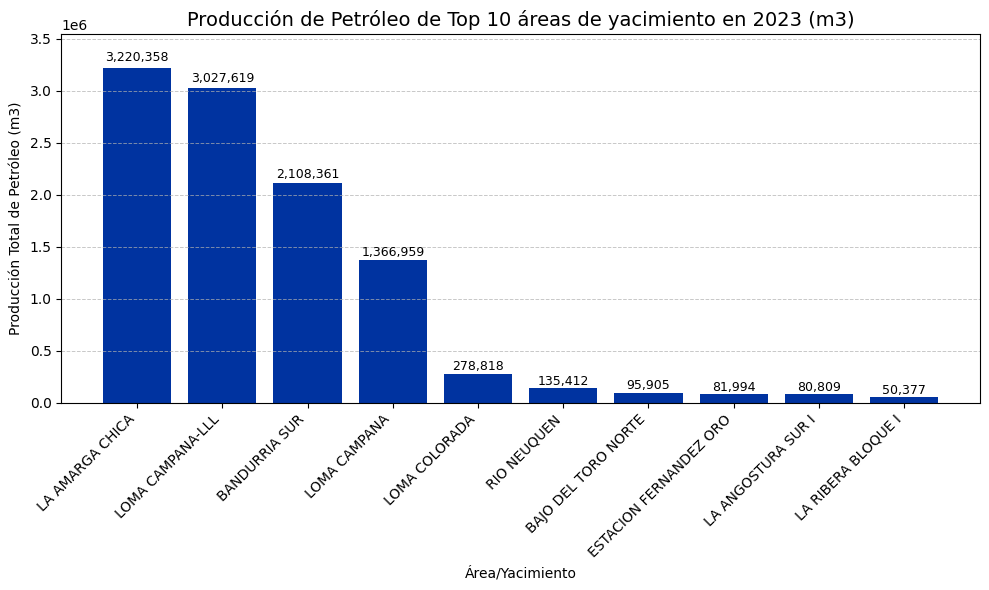

In [ ]:
# Filtrar por a√±o 2023
df_2023 = prod_ypf[prod_ypf['A√±o'] == 2023]

# Agrupar y obtener top 10 yacimientos
top10_yacimientos = (
    df_2023.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos.index, top10_yacimientos.values, color='#0033A0')

ax.set_title('Producci√≥n de Petr√≥leo de Top 10 √°reas de yacimiento en 2023 (m3)', fontsize=14)
ax.set_xlabel('√Årea/Yacimiento')
ax.set_ylabel('Producci√≥n Total de Petr√≥leo (m3)')
ax.set_xticks(range(len(top10_yacimientos.index)))
ax.set_xticklabels(top10_yacimientos.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


**Producci√≥n mensual de petr√≥leo en 2023 en m3 (Top 5 √°reas)**

El gr√°fico presenta la evoluci√≥n mensual de la producci√≥n de petr√≥leo en metros c√∫bicos (m¬≥) durante 2023 en las cinco principales √°reas de Vaca Muerta. Se destacan LA AMARGA CHICA y LOMA CAMPANA-LLL como las l√≠deres de producci√≥n, con valores mensuales que superan consistentemente los 240.000 m¬≥, y alcanzan picos superiores a los 300.000 m¬≥ hacia fin de a√±o.

BANDURRIA SUR muestra un crecimiento sostenido a lo largo del a√±o, pasando de 146.000 m¬≥ en enero a casi 249.000 m¬≥ en diciembre, reflejando un fuerte impulso productivo.

En contraste, LOMA CAMPANA exhibe una tendencia m√°s estable pero decreciente, mientras que LOMA COLORADA, aunque con vol√∫menes mucho menores, evidencia un repunte en los √∫ltimos meses del a√±o tras una ca√≠da abrupta en septiembre.

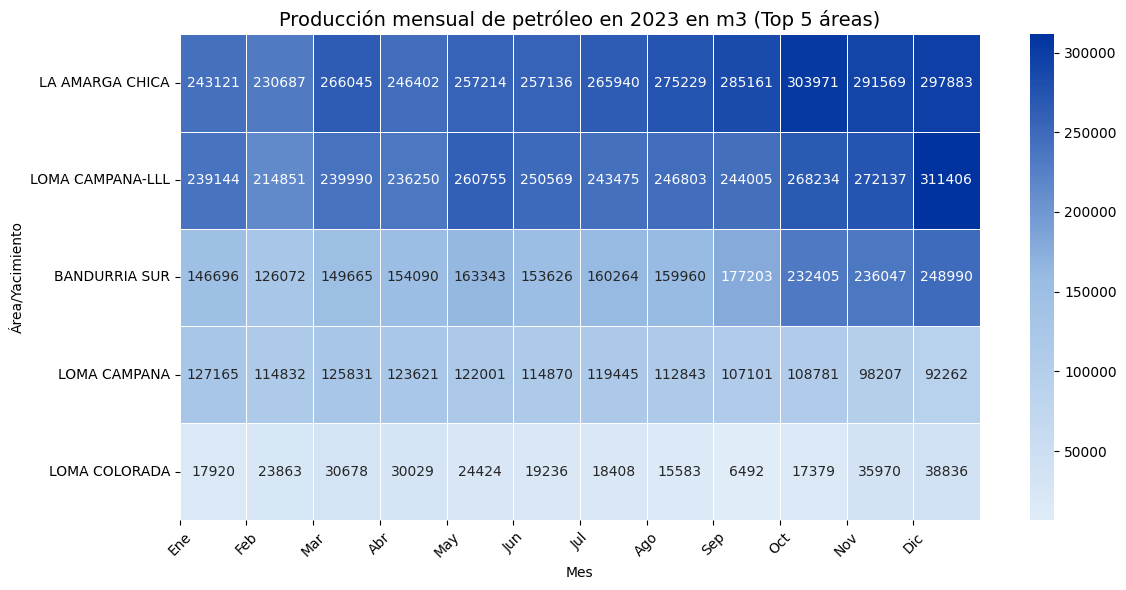

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Paso 1: Filtrar por a√±o 2023
df_2023 = prod_ypf[prod_ypf['A√±o'] == 2023]

# Paso 2: Obtener las Top 10 √°reas/yacimientos por producci√≥n total
top10_yacimientos = (
    df_2023.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 √°reas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 √°reas
df_top5 = df_2023[df_2023['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por √°rea y mes, sumar la producci√≥n
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Petroleo']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producci√≥n total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producci√≥n mensual de petr√≥leo en 2023 en m3 (Top 5 √°reas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("√Årea/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()


**Producci√≥n de Petr√≥leo de las 10 √°reas de yacimiento en el 2024**

El siguiente gr√°fico muestra la producci√≥n de petr√≥leo (m3) de las 10 principales √°reas de yacimiento de YPF en el 2024 en Vaca Muerta. Es importante detallar que la mayor cantidad producida est√° concentrada en 5 √°reas, las mismas son La Amarga Chica, Loma Campana LLL, Bandurria Sur, Loma Campana y Loma colorada. Sin embargo, existe una m√≠nima diferencia en cuanto al nivel productivo de esta √∫ltima, Loma Colorada, que aument√≥ su producci√≥n de petr√≥leo superir al 100% respecto del a√±o anterior.

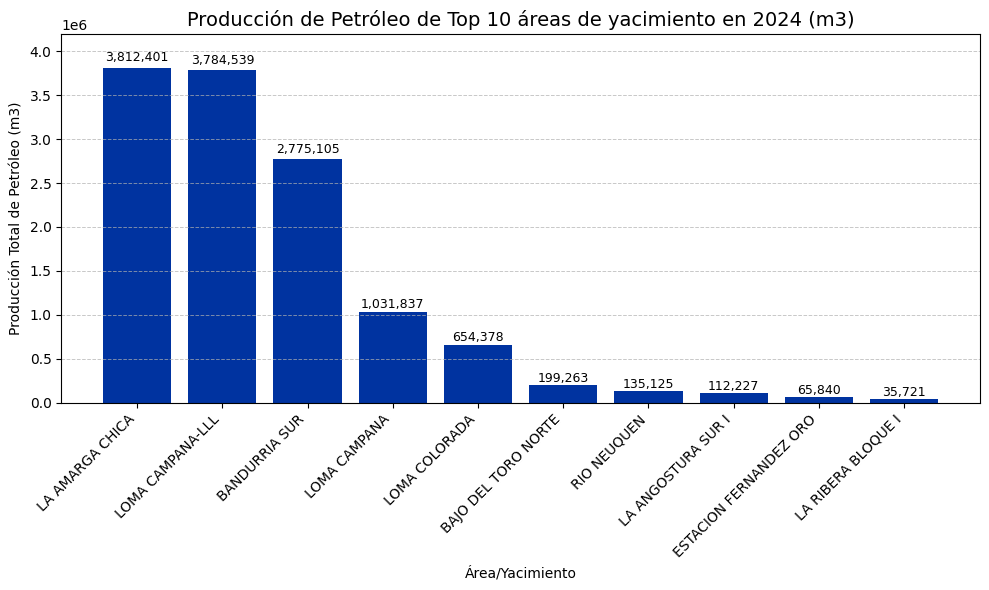

In [ ]:
# Filtrar por a√±o 2024
df_2024 = prod_ypf[prod_ypf['A√±o'] == 2024]

# Agrupar y obtener top 10 yacimientos
top10_yacimientos_2024 = (
    df_2024.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos_2024.index, top10_yacimientos_2024.values, color='#0033A0')

ax.set_title('Producci√≥n de Petr√≥leo de Top 10 √°reas de yacimiento en 2024 (m3)', fontsize=14)
ax.set_xlabel('√Årea/Yacimiento')
ax.set_ylabel('Producci√≥n Total de Petr√≥leo (m3)')
ax.set_xticks(range(len(top10_yacimientos_2024.index)))
ax.set_xticklabels(top10_yacimientos_2024.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos_2024.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Producci√≥n mensual de petr√≥leo en 2024 en m3 (Top 5 √°reas)**

Durante 2024, la producci√≥n de petr√≥leo en Vaca Muerta mostr√≥ una intensificaci√≥n en los niveles operativos, con LOMA CAMPANA-LLL y LA AMARGA CHICA liderando de forma destacada. Ambas √°reas superaron los 350.000 m¬≥ hacia el final del a√±o, marcando r√©cords en diciembre. LOMA CAMPANA-LLL se mantuvo como la m√°s productiva del a√±o, con un leve descenso en el segundo trimestre, pero con una recuperaci√≥n sostenida desde julio en adelante.

BANDURRIA SUR tambi√©n tuvo una evoluci√≥n notable: tras una ca√≠da durante el primer semestre, recuper√≥ impulso y termin√≥ diciembre con un fuerte incremento, alcanzando casi los 294.000 m¬≥, su mayor registro del a√±o.

En contraste, LOMA CAMPANA evidenci√≥ una baja sostenida, con cifras que cayeron por debajo de los 65.000 m¬≥ en diciembre, indicando una posible reducci√≥n operativa o madurez del √°rea.

Finalmente, LOMA COLORADA, aunque sigue siendo la de menor volumen, duplic√≥ su producci√≥n respecto a 2023, destac√°ndose un crecimiento progresivo hasta septiembre, lo que sugiere una expansi√≥n en su desarrollo.

El panorama general de 2024 refleja una consolidaci√≥n de las √°reas m√°s productivas y una reconfiguraci√≥n del mapa operativo, con algunos campos en declive y otros emergiendo con fuerza.

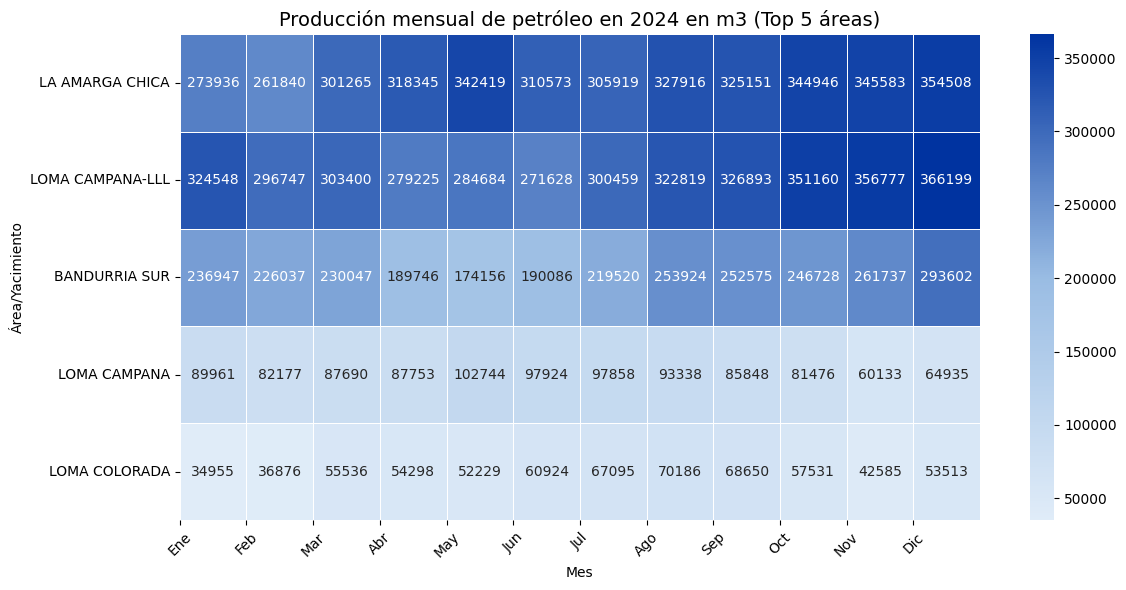

In [ ]:
# Paso 1: Filtrar por a√±o 2024
df_2024 = prod_ypf[prod_ypf['A√±o'] == 2024]

# Paso 2: Obtener las Top 10 √°reas/yacimientos por producci√≥n total
top10_yacimientos = (
    df_2024.groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 √°reas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 √°reas
df_top5 = df_2024[df_2024['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por √°rea y mes, sumar la producci√≥n
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Petroleo']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producci√≥n total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producci√≥n mensual de petr√≥leo en 2024 en m3 (Top 5 √°reas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("√Årea/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()

**Participaci√≥n de la producci√≥n de petr√≥leo de las Top 5 √°reas**

El siguiente gr√°fico circular muestra en detalle la representatividad que manifiesta las principales 5 √°reas de yacimiento en relaci√≥n a un a√±o y el siguiente. Las √°reas que mantuvieron su representatividad son La Amarga Chica y Loma Campana LLL, mientras que Bandurria Sur y Loma Colorada tuvieron un leve repunte de la producci√≥n de petr√≥leo (m3) seg√∫n los porcentajes observados.

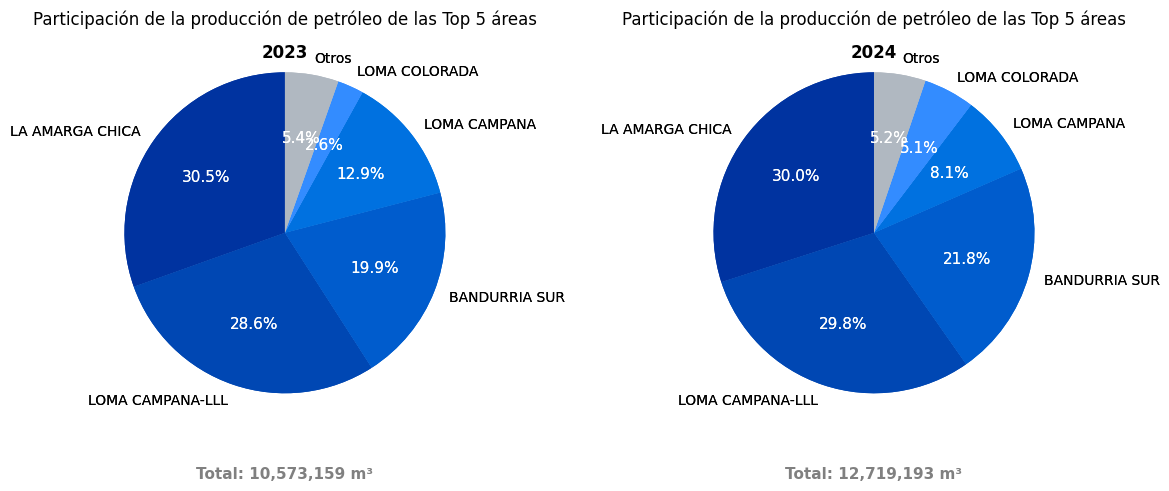

In [ ]:
def preparar_datos_porcentaje(df, a√±o, columna_area, columna_valor, top_n=5):
    df_a√±o = df[df['A√±o'] == a√±o]
    suma_por_area = df_a√±o.groupby(columna_area)[columna_valor].sum()
    top = suma_por_area.sort_values(ascending=False).head(top_n)
    otros = suma_por_area.sum() - top.sum()
    datos = pd.concat([top, pd.Series({'Otros': otros})])
    porcentaje = datos / datos.sum() * 100
    total_produccion = suma_por_area.sum()
    return porcentaje, total_produccion

# Paleta de azules YPF
colores_azules_ypf = ['#0033A0', '#0047B3', '#005CCD', '#0071E0', '#338CFF', '#B0B8C1']

porc_2023, total_2023 = preparar_datos_porcentaje(prod_ypf, 2023, 'areayacimiento', 'Produccion de Petroleo')
porc_2024, total_2024 = preparar_datos_porcentaje(prod_ypf, 2024, 'areayacimiento', 'Produccion de Petroleo')

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gr√°fica 2023
axes[0].pie(porc_2023, labels=porc_2023.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[0].set_title('Participaci√≥n de la producci√≥n de petr√≥leo de las Top 5 √°reas', fontsize=12)
axes[0].text(0.5, 0.95, '2023', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[0].transAxes)
axes[0].text(0.5, -0.1, f'Total: {int(total_2023):,} m¬≥', ha='center', va='center', fontsize=11, color='gray',fontweight='bold', transform=axes[0].transAxes)

# Gr√°fica 2024
axes[1].pie(porc_2024, labels=porc_2024.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[1].set_title('Participaci√≥n de la producci√≥n de petr√≥leo de las Top 5 √°reas', fontsize=12)
axes[1].text(0.5, 0.95, '2024', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[1].transAxes)
axes[1].text(0.5, -0.1, f'Total: {int(total_2024):,} m¬≥', ha='center', va='center', fontsize=11, color='gray',fontweight='bold', transform=axes[1].transAxes)

def func_pct(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

# En el pie chart:
axes[0].pie(porc_2023, labels=porc_2023.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

axes[1].pie(porc_2024, labels=porc_2024.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

# Despu√©s de crear las tortas, cambi√°s el color y tama√±o de los textos de porcentaje:
for text in axes[0].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

for text in axes[1].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

plt.tight_layout()
plt.show()

**Calculamos de producci√≥n de petr√≥leo (m3) - Shale vs Tight por a√±o**

A continuaci√≥n calculamos la sumatoria de producci√≥n de petr√≥leo por a√±o en Vaca Muerta seg√∫n el subtipo de recurso. La diferencia entre shale y tigh radica que para el caso del shale trata sobre la roca sedimentaria. El shale es la roca madre y a la vez el reservorio (auto generador y auto contenedor), para su producci√≥n se necesita fractura hidra√∫lica y pozos horizontales para liberar el gas o el petr√≥leo atrapado en la matriz de la roca. En cambio para el tipo tight el tipo de roca es arenisca, caliza o dolomita muy compacta. En este caso la roca no es generadora, solo almacena el hidrocarburo que migr√≥ desde otra roca madre. Para su producci√≥n tambi√©n requiere fractura hidra√∫lica, pero a veces con menor intensidad.




In [ ]:
# Producci√≥n de petr√≥leo no convencional en 2023, seg√∫n tipo de subrecurso tight
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'TIGHT') & (prod_ypf['A√±o'] == 2023)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producci√≥n 2023 (No Convencional - Tight): {produccion_2023:,} m¬≥")

Producci√≥n 2023 (No Convencional - Tight): 228,240 m¬≥


In [ ]:
# Producci√≥n de petr√≥leo no convencional en 2023, seg√∫n subtipo de recurso shale
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'SHALE') & (prod_ypf['A√±o'] == 2023)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producci√≥n 2023 (No Convencional - Shale): {produccion_2023:,} m¬≥")

Producci√≥n 2023 (No Convencional - Shale): 10,344,919 m¬≥


In [ ]:
# Producci√≥n de petr√≥leo no convencional en 2024, seg√∫n seg√∫n tipo de subrecurso tight
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'TIGHT') & (prod_ypf['A√±o'] == 2024)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producci√≥n 2024 (No Convencional - Tight): {produccion_2023:,} m¬≥")

Producci√≥n 2024 (No Convencional - Tight): 209,049 m¬≥


In [ ]:
# Producci√≥n de petr√≥leo no convencional en 2024, seg√∫n subtipo de recurso shale
filtro_no_conv_2023 = prod_ypf[(prod_ypf['Subtipo de recurso'] == 'SHALE') & (prod_ypf['A√±o'] == 2024)]
produccion_2023 = filtro_no_conv_2023['Produccion de Petroleo'].sum()
print(f"Producci√≥n 2024 (No Convencional - Shale): {produccion_2023:,} m¬≥")

Producci√≥n 2024 (No Convencional - Shale): 12,510,144 m¬≥


**Participaci√≥n de producci√≥n de petr√≥leo - Shale vs Tight**

El gr√°fico circular evidencia que la gran parte de la producci√≥n de petr√≥leo esta dada en el subtipo de recurso shale y no tanto as√≠ en el tight.

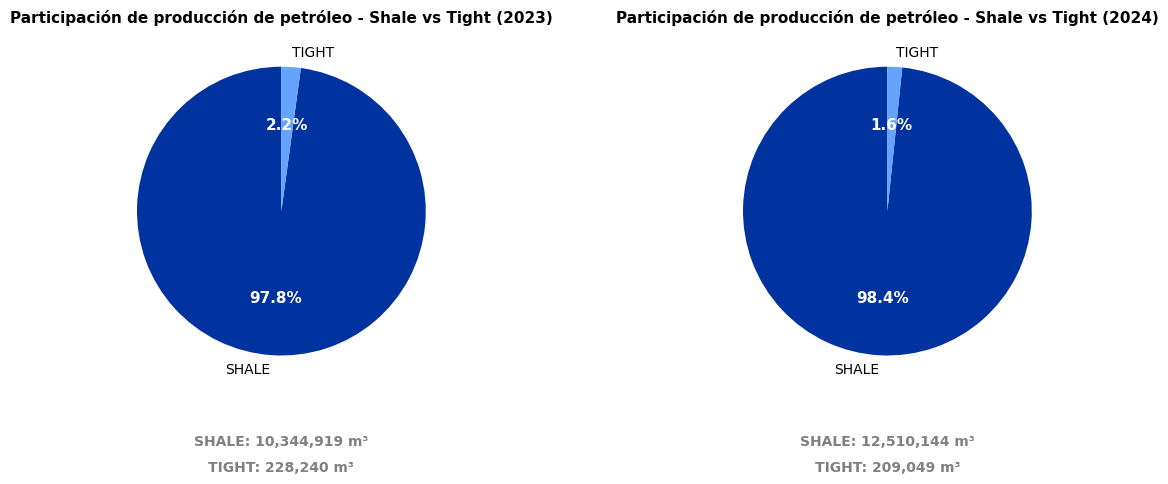

In [ ]:
# Agrupamos la producci√≥n de petr√≥leo por subtipo para 2023 y 2024
data_2023 = prod_ypf[prod_ypf['A√±o'] == 2023].groupby('Subtipo de recurso')['Produccion de Petroleo'].sum()
data_2024 = prod_ypf[prod_ypf['A√±o'] == 2024].groupby('Subtipo de recurso')['Produccion de Petroleo'].sum()

# Nuevos tonos de azul para diferenciar mejor Shale y Tight
colores_azules_ypf = ['#0033A0', '#66A3FF']  # Azul oscuro y azul claro

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# TORTA 2023
wedges1, texts1, autotexts1 = axes[0].pie(
    data_2023,
    labels=data_2023.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[0].set_title('Participaci√≥n de producci√≥n de petr√≥leo - Shale vs Tight (2023)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2023
y0 = -0.15
for i, (subtipo, valor) in enumerate(data_2023.items()):
    axes[0].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} m¬≥',
                 transform=axes[0].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

# TORTA 2024
wedges2, texts2, autotexts2 = axes[1].pie(
    data_2024,
    labels=data_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[1].set_title('Participaci√≥n de producci√≥n de petr√≥leo - Shale vs Tight (2024)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2024
for i, (subtipo, valor) in enumerate(data_2024.items()):
    axes[1].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} m¬≥',
                 transform=axes[1].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

plt.tight_layout()
plt.show()

# Analizamos Producci√≥n de Gas

**Producci√≥n de Gas de las 10 √°reas de yacimiento en el 2023**

El siguiente gr√°fico muestra la producci√≥n de gas (Mm3) de las 10 principales √°reas de yacimiento de YPF en el 2023 en Vaca Muerta. Es importante detallar que la mayor cantidad producida est√° concentrada en 5 √°reas, las mismas son Rinc√≥n del Mangrullo, R√≠o Neuqu√©n, Aguada de la Arena, El Orejano y Loma Campana LLL.

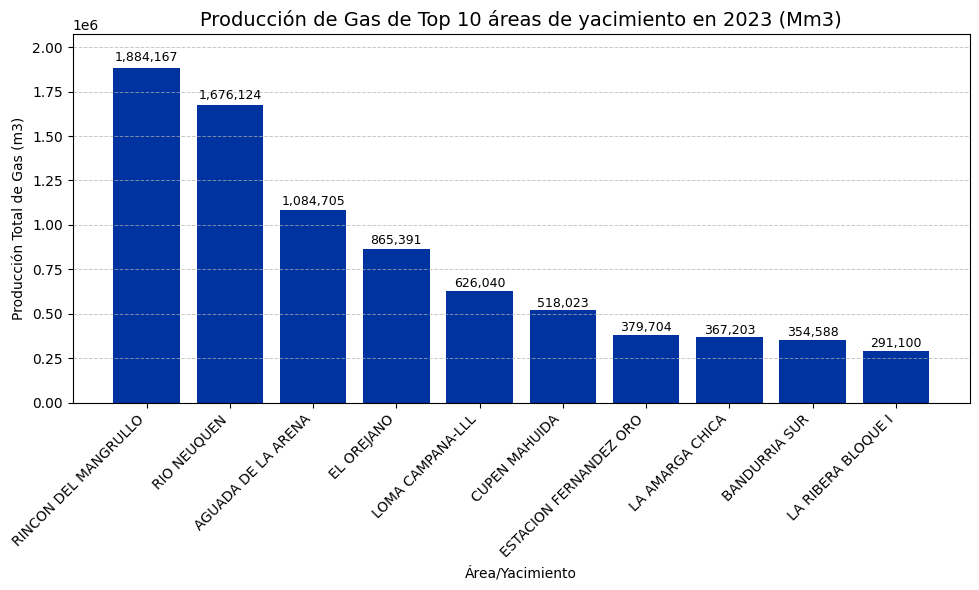

In [ ]:
# Filtrar por a√±o 2023
df_2023 = prod_ypf[prod_ypf['A√±o'] == 2023]

# Agrupar y obtener top 10 yacimientos por Producci√≥n de Gas
top10_yacimientos_gas = (
    df_2023.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos_gas.index, top10_yacimientos_gas.values, color='#0033A0')

ax.set_title('Producci√≥n de Gas de Top 10 √°reas de yacimiento en 2023 (Mm3)', fontsize=14)
ax.set_xlabel('√Årea/Yacimiento')
ax.set_ylabel('Producci√≥n Total de Gas (m3)')
ax.set_xticks(range(len(top10_yacimientos_gas.index)))
ax.set_xticklabels(top10_yacimientos_gas.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos_gas.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Producci√≥n mensual de gas en 2023 en Mm3 (Top 5 √°reas)**

En 2023, RINC√ìN DEL MANGRULLO lider√≥ la producci√≥n de gas en Vaca Muerta, aunque con importantes altibajos: comenz√≥ el a√±o en niveles altos, decay√≥ durante el primer semestre, y mostr√≥ una fuerte recuperaci√≥n en julio y diciembre, mes en el que alcanz√≥ su pico con m√°s de 191.000 Mm¬≥.

RIO NEUQU√âN mantuvo una producci√≥n estable durante todo el a√±o, sin grandes picos pero con una curva sostenida, consolid√°ndose como el segundo mayor productor con valores cercanos a los 150.000 Mm¬≥ en los meses centrales.

AGUADA DE LA ARENA mostr√≥ un crecimiento progresivo hasta mitad de a√±o, con un m√°ximo en mayo-junio. Luego, la producci√≥n cay√≥ dr√°sticamente entre agosto y septiembre, pero logr√≥ estabilizarse en los √∫ltimos meses.

Por su parte, EL OREJANO present√≥ una curva irregular, con su mejor rendimiento en agosto (casi 87.000 Mm¬≥), pero cerrando el a√±o con una ca√≠da significativa, lo que podr√≠a reflejar una merma operativa.

Finalmente, LOMA CAMPANA-LLL fue la de menor volumen entre las cinco, con una producci√≥n moderada y sostenida, aunque sin variaciones destacadas.

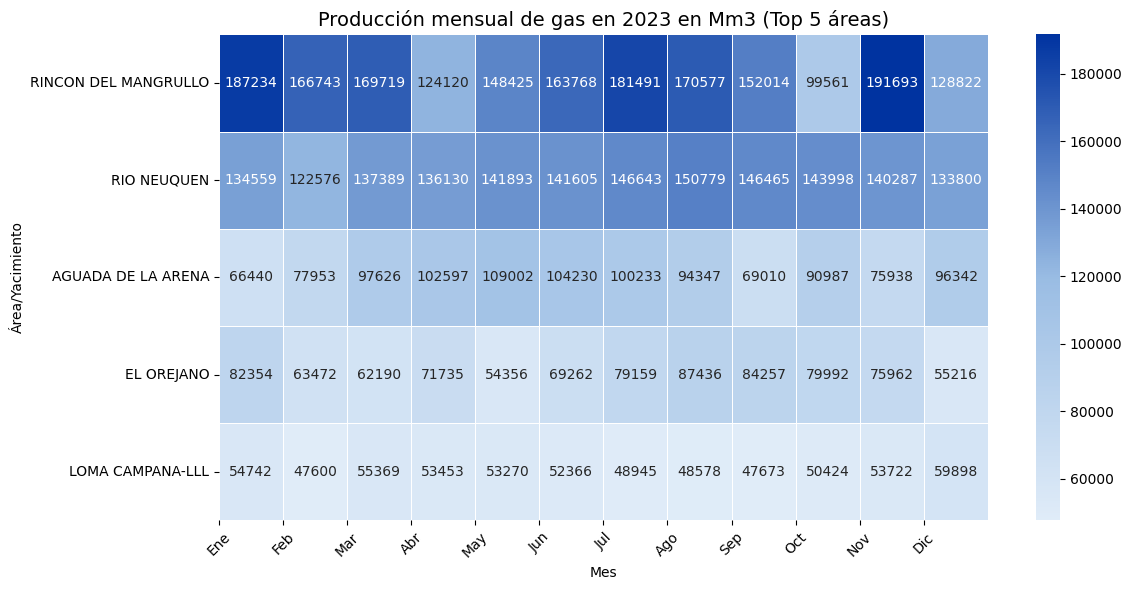

In [ ]:
# Paso 1: Filtrar por a√±o 2023
df_2023 = prod_ypf[prod_ypf['A√±o'] == 2023]

# Paso 2: Obtener las Top 10 √°reas/yacimientos por producci√≥n de Gas
top10_yacimientos = (
    df_2023.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 √°reas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 √°reas
df_top5 = df_2023[df_2023['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por √°rea y mes, sumar la producci√≥n
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Gas']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producci√≥n total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producci√≥n mensual de gas en 2023 en Mm3 (Top 5 √°reas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("√Årea/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()

**Producci√≥n de Gas de las 10 √°reas de yacimiento en el 2024**

El siguiente gr√°fico muestra la producci√≥n de gas (Mm3) de las 10 principales √°reas de yacimiento de YPF en el 2023 en Vaca Muerta. Es importante detallar que la mayor cantidad producida est√° concentrada en 5 √°reas, las mismas son Rinc√≥n del Mangrullo, R√≠o Neuqu√©n, Aguada de la Arena, Loma Campana LLL y El Orejano.

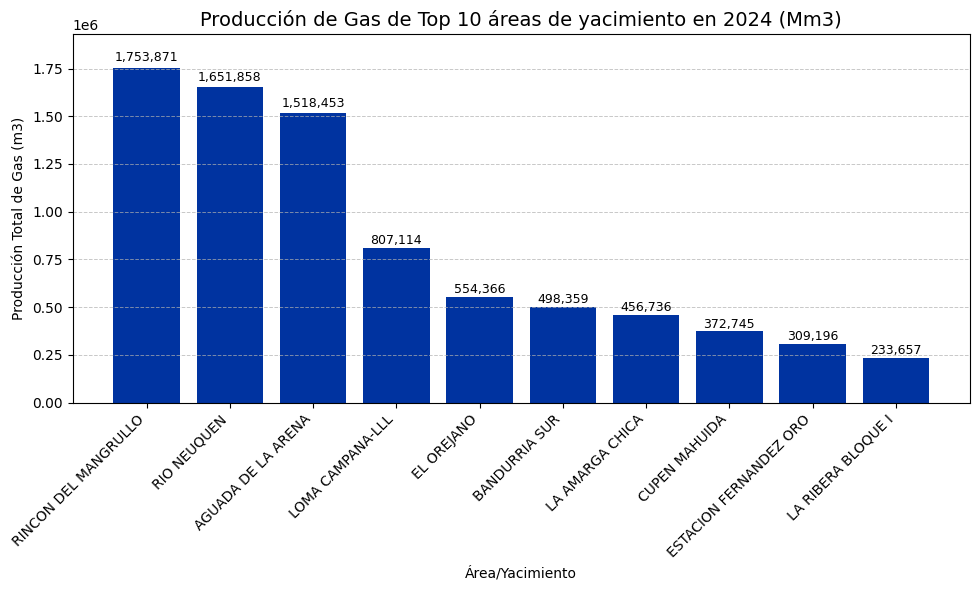

In [ ]:
# Filtrar por a√±o 2024
df_2024 = prod_ypf[prod_ypf['A√±o'] == 2024]

# Agrupar y obtener top 10 yacimientos por Producci√≥n de Gas
top10_yacimientos_gas_2024 = (
    df_2024.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(10,6))

ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

bars = ax.bar(top10_yacimientos_gas_2024.index, top10_yacimientos_gas_2024.values, color='#0033A0')

ax.set_title('Producci√≥n de Gas de Top 10 √°reas de yacimiento en 2024 (Mm3)', fontsize=14)
ax.set_xlabel('√Årea/Yacimiento')
ax.set_ylabel('Producci√≥n Total de Gas (m3)')
ax.set_xticks(range(len(top10_yacimientos_gas_2024.index)))
ax.set_xticklabels(top10_yacimientos_gas_2024.index, rotation=45, ha='right')

ax.set_ylim(0, top10_yacimientos_gas_2024.values.max() * 1.1)

# Etiquetas arriba de las barras
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f'{yval:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Producci√≥n mensual de gas en 2024 en Mm3 (Top 5 √°reas)**

Durante 2024, RINC√ìN DEL MANGRULLO volvi√≥ a liderar la producci√≥n de gas, aunque con un desempe√±o m√°s irregular que en 2023. Si bien alcanz√≥ su pico en marzo con m√°s de 192.000 Mm¬≥, desde mayo en adelante mostr√≥ una tendencia descendente, cerrando el a√±o en diciembre con apenas 53.632 Mm¬≥, lo que sugiere posibles problemas operativos o restricciones t√©cnicas.

RIO NEUQU√âN mantuvo su rol como segundo productor con gran estabilidad en la primera mitad del a√±o, superando los 150.000 Mm¬≥ entre mayo y julio. Sin embargo, desde agosto se observa un leve pero sostenido descenso, cayendo a poco m√°s de 123.000 Mm¬≥ en diciembre.

La gran sorpresa del a√±o fue AGUADA DE LA ARENA, que tuvo un fuerte crecimiento entre abril y agosto, destac√°ndose con un m√°ximo de 193.485 Mm¬≥ en agosto, incluso superando moment√°neamente a Rinc√≥n del Mangrullo. No obstante, esta alza fue seguida por una marcada ca√≠da en los √∫ltimos meses, posiblemente por razones operativas o log√≠sticas.

LOMA CAMPANA-LLL mostr√≥ una recuperaci√≥n continua a lo largo del a√±o: parti√≥ de cifras moderadas en enero (62.136 Mm¬≥) y cerr√≥ en diciembre con su mejor marca: 87.633 Mm¬≥. Esto sugiere una estrategia de optimizaci√≥n o inversi√≥n en infraestructura.

Finalmente, EL OREJANO tuvo un a√±o muy vol√°til: inici√≥ con niveles bajos, repunt√≥ a mediados de a√±o, pero volvi√≥ a caer fuertemente en octubre y noviembre. Esta inestabilidad puede estar relacionada con la variabilidad de los pozos o decisiones estrat√©gicas de producci√≥n.

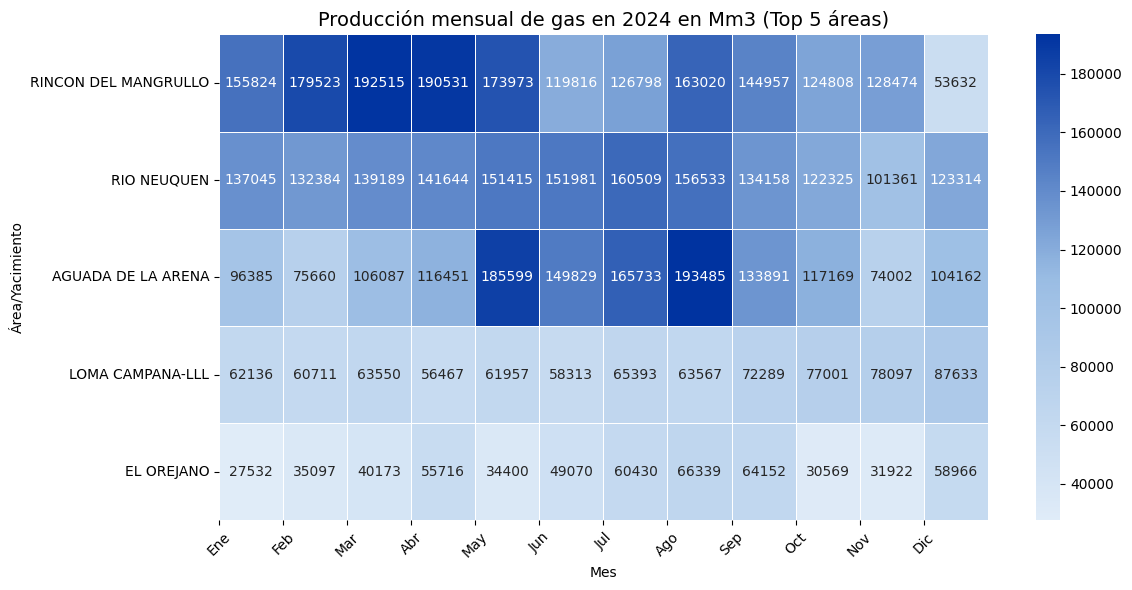

In [ ]:
# Paso 1: Filtrar por a√±o 2024
df_2024 = prod_ypf[prod_ypf['A√±o'] == 2024]

# Paso 2: Obtener las Top 10 √°reas/yacimientos por producci√≥n de Gas
top10_yacimientos = (
    df_2024.groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Paso 3: Seleccionar las Top 5 √°reas
top5_areas = top10_yacimientos.head(5).index

# Paso 4: Filtrar el DataFrame para las Top 5 √°reas
df_top5 = df_2024[df_2024['areayacimiento'].isin(top5_areas)]

# Paso 5: (Opcional) Crear columna 'Mes' si no existe
# df_top5['Mes'] = pd.to_datetime(df_top5['Fecha']).dt.month  # Descomentar si es necesario

# Paso 6: Agrupar por √°rea y mes, sumar la producci√≥n
produccion_mensual = (
    df_top5
    .groupby(['areayacimiento', 'Mes'])['Produccion de Gas']
    .sum()
    .unstack(fill_value=0)
)

# Paso 7: Reordenar las filas por producci√≥n total anual (de mayor a menor)
orden_areas = produccion_mensual.sum(axis=1).sort_values(ascending=False).index
produccion_mensual = produccion_mensual.loc[orden_areas]

# Paso 8: Crear paleta de colores personalizada con azul YPF
ypf_blues = LinearSegmentedColormap.from_list("ypf_blues", ["#e0ecf8", "#99bce3", "#0033A0"])

# Paso 9: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(produccion_mensual, annot=True, fmt=".0f", cmap=ypf_blues, linewidths=.5)

plt.title("Producci√≥n mensual de gas en 2024 en Mm3 (Top 5 √°reas)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("√Årea/Yacimiento")
plt.xticks(
    ticks=range(12),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)
plt.tight_layout()
plt.show()

**Participaci√≥n de la gas de petr√≥leo de las Top 5 √°reas**

El siguiente gr√°fico circular muestra en detalle la representatividad que manifiesta las principales 5 √°reas de yacimiento en relaci√≥n a la producci√≥n de gas de un a√±o y el siguiente. El √°rea que mantuvo su participaci√≥n fue R√≠o Neuqu√©n con el 19%, mientras que las dem√°s √°reas tuvieron una leve variaci√≥n en la participaci√≥n, como por ejemplo la Aguada de la Arena que aument√≥ un 5% la misma, siendo este dato finalmente del 17% en el 2024.

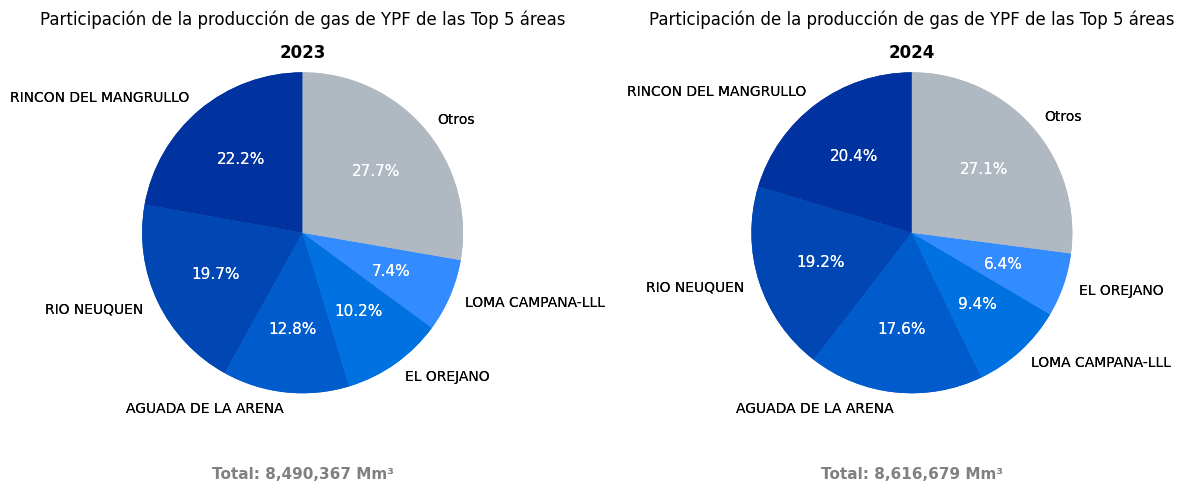

In [ ]:
def preparar_datos_porcentaje(df, a√±o, columna_area, columna_valor, top_n=5):
    df_a√±o = df[df['A√±o'] == a√±o]
    suma_por_area = df_a√±o.groupby(columna_area)[columna_valor].sum()
    top = suma_por_area.sort_values(ascending=False).head(top_n)
    otros = suma_por_area.sum() - top.sum()
    datos = pd.concat([top, pd.Series({'Otros': otros})])
    porcentaje = datos / datos.sum() * 100
    total_produccion = suma_por_area.sum()
    return porcentaje, total_produccion

# Paleta de azules YPF
colores_azules_ypf = ['#0033A0', '#0047B3', '#005CCD', '#0071E0', '#338CFF', '#B0B8C1']

porc_2023_gas, total_2023_gas = preparar_datos_porcentaje(prod_ypf, 2023, 'areayacimiento', 'Produccion de Gas')
porc_2024_gas, total_2024_gas = preparar_datos_porcentaje(prod_ypf, 2024, 'areayacimiento', 'Produccion de Gas')

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gr√°fica 2023
axes[0].pie(porc_2023_gas, labels=porc_2023_gas.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[0].set_title('Participaci√≥n de la producci√≥n de gas de YPF de las Top 5 √°reas', fontsize=12)
axes[0].text(0.5, 0.95, '2023', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[0].transAxes)
axes[0].text(0.5, -0.1, f'Total: {int(total_2023_gas):,} Mm¬≥', ha='center', va='center', fontsize=11, color='gray', fontweight='bold', transform=axes[0].transAxes)

# Gr√°fica 2024
axes[1].pie(porc_2024_gas, labels=porc_2024_gas.index, autopct='%1.1f%%', startangle=90, colors=colores_azules_ypf)
axes[1].set_title('Participaci√≥n de la producci√≥n de gas de YPF de las Top 5 √°reas', fontsize=12)
axes[1].text(0.5, 0.95, '2024', ha='center', va='center', fontsize=12, fontweight='bold', transform=axes[1].transAxes)
axes[1].text(0.5, -0.1, f'Total: {int(total_2024_gas):,} Mm¬≥', ha='center', va='center', fontsize=11, color='gray', fontweight='bold', transform=axes[1].transAxes)

def func_pct(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

# En el pie chart:
axes[0].pie(porc_2023_gas, labels=porc_2023_gas.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

axes[1].pie(porc_2024_gas, labels=porc_2024_gas.index,
            autopct=func_pct,
            startangle=90,
            colors=colores_azules_ypf)

# Cambiar color y tama√±o de los textos de porcentaje:
for text in axes[0].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

for text in axes[1].texts:
    if '%' in text.get_text():
        text.set_color('white')
        text.set_fontsize(11)

plt.tight_layout()
plt.show()

**Participaci√≥n de producci√≥n de gas - Shale vs Tight**

A continuaci√≥n se puede observar un gr√°fico circular por el a√±o 2023 y 2024 de la participaci√≥n en la producci√≥n de gas seg√∫n el subtipo de recurso. En este caso se da una diferencia con respecto a la producci√≥n de petr√≥leo ya que si hay mayor producci√≥n del subtipo Tigth, siendo un promedio 65% shale y 35% tignt entre ambos a√±os.

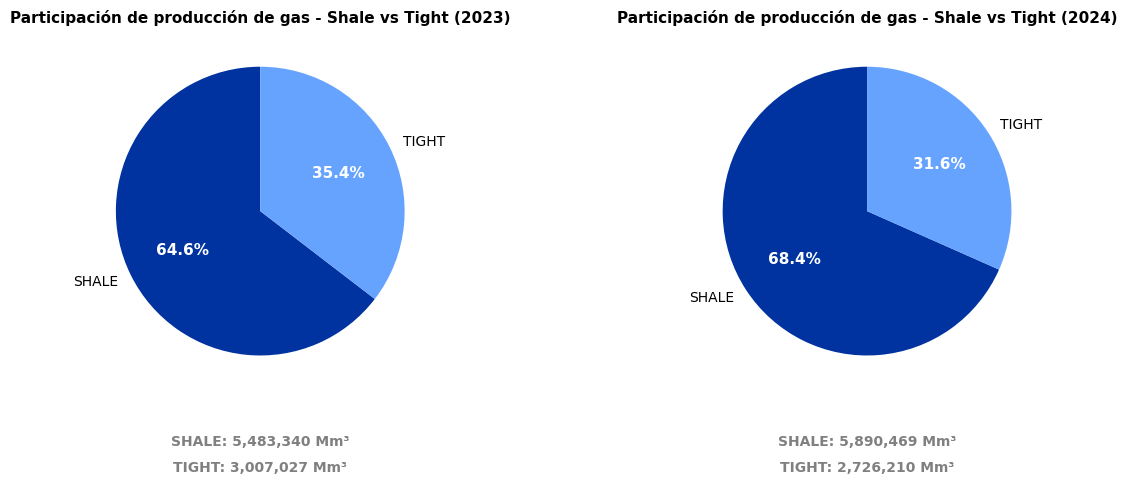

In [ ]:
# Agrupamos la producci√≥n de gas por subtipo para 2023 y 2024
data_2023 = prod_ypf[prod_ypf['A√±o'] == 2023].groupby('Subtipo de recurso')['Produccion de Gas'].sum()
data_2024 = prod_ypf[prod_ypf['A√±o'] == 2024].groupby('Subtipo de recurso')['Produccion de Gas'].sum()

# Nuevos tonos de azul para diferenciar mejor Shale y Tight
colores_azules_ypf = ['#0033A0', '#66A3FF']  # Azul oscuro y azul claro

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# TORTA 2023
wedges1, texts1, autotexts1 = axes[0].pie(
    data_2023,
    labels=data_2023.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[0].set_title('Participaci√≥n de producci√≥n de gas - Shale vs Tight (2023)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2023
y0 = -0.15
for i, (subtipo, valor) in enumerate(data_2023.items()):
    axes[0].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} Mm¬≥',
                 transform=axes[0].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

# TORTA 2024
wedges2, texts2, autotexts2 = axes[1].pie(
    data_2024,
    labels=data_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores_azules_ypf
)
axes[1].set_title('Participaci√≥n de producci√≥n de gas - Shale vs Tight (2024)', fontsize=11, fontweight='bold')

# Colorear de blanco los porcentajes
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Mostrar los totales debajo de la torta 2024
for i, (subtipo, valor) in enumerate(data_2024.items()):
    axes[1].text(0.5, y0 - i*0.07, f'{subtipo}: {int(valor):,} Mm¬≥',
                 transform=axes[1].transAxes, ha='center', fontsize=10, color='gray', fontweight='bold')

plt.tight_layout()
plt.show()

Vamos a ver que valores est√°n incluidas en cada categor√≠a

In [ ]:
#Para el caso de tipo de pozo podemos ver las diferentes categor√≠as y el conteo de las mismas
prod_ypf.groupby('Tipo de estado')['Tipo de estado'].count()

Tipo de estado
A Abandonar                            1247
Abandonado                              590
Abandono Temporario                     219
En Espera de Reparaci√≥n                 809
En Estudio                             3439
En Inyecci√≥n Efectiva                   271
En Reparaci√≥n                           153
En Reserva de Gas                       633
En Reserva para Recup. Sec./Asist.       50
Extracci√≥n Efectiva                   44493
Otras Situaci√≥n Activo                    7
Otras Situaci√≥n Inactivo                108
Parado Alta Relaci√≥n Agua/Petr√≥leo        5
Parado Alta Relaci√≥n Gas/Petr√≥leo        27
Parado Transitoriamente                4367
Name: Tipo de estado, dtype: int64

In [ ]:
#Normalizamos la feature tipo de estado, se puede observar que la mayor proporci√≥n es la extracci√≥n efectiva con un 78,86%
prod_ypf['Tipo de estado'].value_counts(normalize=True)

Tipo de estado
Extracci√≥n Efectiva                   0.788631
Parado Transitoriamente               0.077404
En Estudio                            0.060956
A Abandonar                           0.022103
En Espera de Reparaci√≥n               0.014339
En Reserva de Gas                     0.011220
Abandonado                            0.010458
En Inyecci√≥n Efectiva                 0.004803
Abandono Temporario                   0.003882
En Reparaci√≥n                         0.002712
Otras Situaci√≥n Inactivo              0.001914
En Reserva para Recup. Sec./Asist.    0.000886
Parado Alta Relaci√≥n Gas/Petr√≥leo     0.000479
Otras Situaci√≥n Activo                0.000124
Parado Alta Relaci√≥n Agua/Petr√≥leo    0.000089
Name: proportion, dtype: float64

In [ ]:
#Ac√° vemos el recuento de registros para las categorias del feature Tipo de extracci√≥n
prod_ypf.groupby('Tipo de extraccion')['Tipo de extraccion'].count()

Tipo de extraccion
Bombeo Mec√°nico               8791
Electrosumergible               25
Gas Lift                       420
Plunger Lift                 14855
Sin Sistema de Extracci√≥n     1201
Surgencia Natural            31126
Name: Tipo de extraccion, dtype: int64

In [ ]:
#En este caso al normalizar, se puede observar que el 55,17% de los datos est√° concentrado en la categor√≠a Surgencia Natural
prod_ypf['Tipo de extraccion'].value_counts(normalize=True)

Tipo de extraccion
Surgencia Natural            0.551703
Plunger Lift                 0.263302
Bombeo Mec√°nico              0.155819
Sin Sistema de Extracci√≥n    0.021288
Gas Lift                     0.007444
Electrosumergible            0.000443
Name: proportion, dtype: float64

In [ ]:
#Ac√° vemos el recuento de registros para las categorias del feature Tipo de pozo
prod_ypf.groupby('Tipo de pozo')['Tipo de pozo'].count()

Tipo de pozo
Gas√≠fero             20207
Inyecci√≥n de Agua       21
Otro tipo             6358
Petrol√≠fero          29581
Sumidero               251
Name: Tipo de pozo, dtype: int64

In [ ]:
#Normalizamos la feature tipo de pozo, siendo el 52,43% de los registros para la categor√≠a Petrol√≠fero, luego sigue el caso de Gas√≠fero con el 35,81%
prod_ypf['Tipo de pozo'].value_counts(normalize=True)

Tipo de pozo
Petrol√≠fero          0.524318
Gas√≠fero             0.358166
Otro tipo            0.112695
Sumidero             0.004449
Inyecci√≥n de Agua    0.000372
Name: proportion, dtype: float64

In [ ]:
#Areas de concesi√≥n
prod_ypf.groupby('Area de permiso de concesion')['Area de permiso de concesion'].count()

Area de permiso de concesion
AGUADA DE LA ARENA                 832
AGUADA DEL CHA√ëAR                  472
AL NORTE DE LA DORSAL             1080
BAJO DEL TORO                       54
BAJO DEL TORO NORTE                428
BANDURRIA SUR                     3061
CERRO ARENA                        108
CERRO LAS MINAS                     27
CERRO MANRIQUE                      16
CHIHUIDO DE LA SIERRA NEGRA         81
CN VII A                            14
DADIN                               48
EL OREJANO                        2544
ESTACION FERNANDEZ ORO            4924
FILO MORADO                         54
LA AMARGA CHICA                   5572
LA ANGOSTURA SUR I                 217
LA ANGOSTURA SUR II                 54
LA RIBERA BLOQUE I                 540
LA RIBERA BLOQUE II                 27
LAS MANADAS                         81
LAS TACANAS                         91
LOMA AMARILLA SUR                  107
LOMA CAMPANA                     20937
LOMA DEL MOLLE                      52
LOMA LA LATA - SIERRA BARROSA     6131
LOS CALDENES                       108
NARAMBUENA                         243
OCTOGONO                           351
PASO DE LAS BARDAS NORTE            95
RINCON DEL MANGRULLO              5043
RIO NEUQUEN                       2999
VALLE DEL RIO GRANDE                27
Name: Area de permiso de concesion, dtype: int64

**Mapa de la producci√≥n de petr√≥leo de las principales 5 √°reas en el 2023**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales √°reas de producci√≥n de petr√≥leo en 2023
top10_yacimientos_2023 = (
    prod_ypf[prod_ypf['A√±o'] == 2023]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_petroleo_2023 = top10_yacimientos_2023.head(5).index.tolist()

# Filtrar los datos de esas √°reas
df_top5_petroleo_2023 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_petroleo_2023)) &
    (prod_ypf['A√±o'] == 2023) &
    (prod_ypf['Produccion de Petroleo'] > 0)
].copy()

# Producci√≥n total 2023 por √°rea
produccion_total_2023 = df_top5_petroleo_2023.groupby('areayacimiento')['Produccion de Petroleo'].sum().astype(int)

# Producci√≥n total 2022 por √°rea
produccion_total_2023 = (
    prod_ypf[prod_ypf['A√±o'] == 2023]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_petroleo_2023['coordenaday'].mean()
center_lon = df_top5_petroleo_2023['coordenadax'].mean()

# Crear figura con tama√±o m√°s grande
fig = Figure(width=1000, height=900)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por √°rea
centroides_areas = df_top5_petroleo_2023.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos (lat, lon) para que las etiquetas no se superpongan
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# A√±adir marcador azul + nombre y producci√≥n debajo como etiqueta persistente
for i, area in enumerate(top5_areas_petroleo_2023):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        produccion_2023 = produccion_total_2023[area]
        produccion_2022 = produccion_total_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2023: {produccion_2023:,} m¬≥"
        ).add_to(m)

        # Aplico desplazamiento para evitar superposici√≥n
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre arriba y producci√≥n debajo
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{produccion_2023:,} m¬≥
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

**Mapa de la producci√≥n de gas de las principales 5 √°reas en el 2023**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales √°reas de producci√≥n de gas en 2023
top10_gas_2023 = (
    prod_ypf[prod_ypf['A√±o'] == 2023]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_gas_2023 = top10_gas_2023.head(5).index.tolist()

# Filtrar los datos de esas √°reas
df_top5_gas_2023 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_gas_2023)) &
    (prod_ypf['A√±o'] == 2023) &
    (prod_ypf['Produccion de Gas'] > 0)
].copy()

# Producci√≥n total 2023 por √°rea
produccion_total_gas_2023 = df_top5_gas_2023.groupby('areayacimiento')['Produccion de Gas'].sum().astype(int)

# Producci√≥n total 2023 por √°rea
produccion_total_gas_2023 = (
    prod_ypf[prod_ypf['A√±o'] == 2023]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_gas_2023['coordenaday'].mean()
center_lon = df_top5_gas_2023['coordenadax'].mean()

# Crear figura con tama√±o m√°s grande
fig = Figure(width=800, height=600)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por √°rea
centroides_areas = df_top5_gas_2023.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos para evitar superposici√≥n
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# A√±adir marcador azul + nombre y producci√≥n debajo como etiqueta persistente
for i, area in enumerate(top5_areas_gas_2023):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        gas_2023 = produccion_total_gas_2023[area]
        gas_2022 = produccion_total_gas_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2023: {gas_2023:,} Mm¬≥"
        ).add_to(m)

        # Aplicar desplazamiento
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre + producci√≥n anterior
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{gas_2023:,} Mm¬≥
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

**Mapa de la producci√≥n de petr√≥leo de las principales 5 √°reas en el 2024**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales √°reas de producci√≥n de petr√≥leo en 2024
top10_yacimientos_2024 = (
    prod_ypf[prod_ypf['A√±o'] == 2024]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_petroleo_2024 = top10_yacimientos_2024.head(5).index.tolist()

# Filtrar los datos de esas √°reas
df_top5_petroleo_2024 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_petroleo_2024)) &
    (prod_ypf['A√±o'] == 2024) &
    (prod_ypf['Produccion de Petroleo'] > 0)
].copy()

# Promedio de producci√≥n por √°rea
produccion_promedio_por_area = df_top5_petroleo_2024.groupby('areayacimiento')['Produccion de Petroleo'].sum().astype(int)

# Producci√≥n total 2023 por √°rea
produccion_total_2023 = (
    prod_ypf[prod_ypf['A√±o'] == 2023]
    .groupby('areayacimiento')['Produccion de Petroleo']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_petroleo_2024['coordenaday'].mean()
center_lon = df_top5_petroleo_2024['coordenadax'].mean()

# Crear figura con tama√±o m√°s grande
fig = Figure(width=1000, height=900)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por √°rea
centroides_areas = df_top5_petroleo_2024.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos (lat, lon) para que las etiquetas no se superpongan
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# A√±adir marcador azul + nombre y producci√≥n debajo como etiqueta persistente
for i, area in enumerate(top5_areas_petroleo_2024):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        produccion_2024 = produccion_promedio_por_area[area]
        produccion_2023 = produccion_total_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2024: {produccion_2024:,} m¬≥"
        ).add_to(m)

        # Aplico desplazamiento para evitar superposici√≥n
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre arriba y producci√≥n debajo
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{produccion_2023:,} m¬≥
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

**Mapa de la producci√≥n de gas de las principales 5 √°reas en el 2024**

In [ ]:
import folium
from folium import Map, Marker
from folium.map import Icon
from branca.element import Figure

# Obtener las 5 principales √°reas de producci√≥n de gas en 2024
top10_gas_2024 = (
    prod_ypf[prod_ypf['A√±o'] == 2024]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .sort_values(ascending=False)
)

top5_areas_gas_2024 = top10_gas_2024.head(5).index.tolist()

# Filtrar los datos de esas √°reas
df_top5_gas_2024 = prod_ypf[
    (prod_ypf['areayacimiento'].isin(top5_areas_gas_2024)) &
    (prod_ypf['A√±o'] == 2024) &
    (prod_ypf['Produccion de Gas'] > 0)
].copy()

# Producci√≥n total 2024 por √°rea
produccion_total_gas_2024 = df_top5_gas_2024.groupby('areayacimiento')['Produccion de Gas'].sum().astype(int)

# Producci√≥n total 2023 por √°rea
produccion_total_gas_2023 = (
    prod_ypf[prod_ypf['A√±o'] == 2023]
    .groupby('areayacimiento')['Produccion de Gas']
    .sum()
    .astype(int)
)

# Calcular centroide del mapa
center_lat = df_top5_gas_2024['coordenaday'].mean()
center_lon = df_top5_gas_2024['coordenadax'].mean()

# Crear figura con tama√±o m√°s grande
fig = Figure(width=800, height=600)
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
fig.add_child(m)

# Centroide por √°rea
centroides_areas = df_top5_gas_2024.groupby('areayacimiento')[['coordenaday', 'coordenadax']].mean()

# Lista de desplazamientos para evitar superposici√≥n
offsets = [
    (0.01, 0.01),
    (-0.01, 0.01),
    (0.01, -0.01),
    (-0.01, -0.01),
    (0.015, 0)
]

# A√±adir marcador azul + nombre y producci√≥n debajo como etiqueta persistente
for i, area in enumerate(top5_areas_gas_2024):
    if area in centroides_areas.index:
        lat, lon = centroides_areas.loc[area]
        gas_2024 = produccion_total_gas_2024[area]
        gas_2023 = produccion_total_gas_2023.get(area, 0)

        # Marcador gotita azul YPF
        folium.Marker(
            location=[lat, lon],
            icon=Icon(color='blue', icon='tint', prefix='fa'),
            popup=f"<b>{area}</b><br>2024: {gas_2024:,} Mm¬≥"
        ).add_to(m)

        # Aplicar desplazamiento
        offset_lat, offset_lon = offsets[i % len(offsets)]
        etiqueta_lat = lat + offset_lat
        etiqueta_lon = lon + offset_lon

        # Etiqueta con nombre + producci√≥n
        folium.map.Marker(
            [etiqueta_lat, etiqueta_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 12px;
                    font-weight: bold;
                    color: #0033A0;
                    background-color: rgba(255, 255, 255, 0.85);
                    padding: 2px 5px;
                    border-radius: 4px;
                    box-shadow: 1px 1px 2px #ccc;
                    text-align: center;">
                    {area}<br>{gas_2023:,} Mm¬≥
                </div>
                """
            )
        ).add_to(m)

# Mostrar el mapa
m

In [ ]:
#Loma campana es el √°rea de permiso de concesi√≥n mayoritaria para YPF
prod_ypf['Area de permiso de concesion'].value_counts(normalize=True)

Area de permiso de concesion
LOMA CAMPANA                     0.371105
LOMA LA LATA - SIERRA BARROSA    0.108671
LA AMARGA CHICA                  0.098763
RINCON DEL MANGRULLO             0.089386
ESTACION FERNANDEZ ORO           0.087277
BANDURRIA SUR                    0.054256
RIO NEUQUEN                      0.053157
EL OREJANO                       0.045092
AL NORTE DE LA DORSAL            0.019143
AGUADA DE LA ARENA               0.014747
LA RIBERA BLOQUE I               0.009571
AGUADA DEL CHA√ëAR                0.008366
BAJO DEL TORO NORTE              0.007586
OCTOGONO                         0.006221
NARAMBUENA                       0.004307
LA ANGOSTURA SUR I               0.003846
LOS CALDENES                     0.001914
CERRO ARENA                      0.001914
LOMA AMARILLA SUR                0.001897
PASO DE LAS BARDAS NORTE         0.001684
LAS TACANAS                      0.001613
LAS MANADAS                      0.001436
CHIHUIDO DE LA SIERRA NEGRA      0.001436
BAJO DEL TORO                    0.000957
FILO MORADO                      0.000957
LA ANGOSTURA SUR II              0.000957
LOMA DEL MOLLE                   0.000922
DADIN                            0.000851
VALLE DEL RIO GRANDE             0.000479
LA RIBERA BLOQUE II              0.000479
CERRO LAS MINAS                  0.000479
CERRO MANRIQUE                   0.000284
CN VII A                         0.000248
Name: proportion, dtype: float64

In [ ]:
#Areas de yacimientos
prod_ypf.groupby('areayacimiento')['areayacimiento'].count()

areayacimiento
AGUADA DE LA ARENA               832
BAJO DEL TORO                     54
BAJO DEL TORO NORTE              428
BANDURRIA SUR                   3061
BARDA GONZALEZ                    54
BARREALES COLORADOS               27
BARROSA NORTE                    567
CAMPAMENTO DOS                    27
CERRO ARENA                      108
CERRO LAS MINAS                   27
CERRO MANRIQUE                    16
CHIHUIDO DE LA SIERRA NEGRA       81
CN VII A                          14
CUPEN                             27
CUPEN MAHUIDA                   4914
EL CORDON OESTE                   54
EL OREJANO                      2544
EL TRIANGULO                      27
ESTACION FERNANDEZ ORO          4924
FILO MORADO                       54
GUANACO                         1026
HUINCUL                           48
LA AMARGA CHICA                 5572
LA ANGOSTURA SUR I               217
LA ANGOSTURA SUR II               54
LA RIBERA BLOQUE I               540
LA RIBERA BLOQUE II               27
LAS MANADAS                       81
LAS TACANAS                       91
LOMA AMARILLA SUR                107
LOMA CAMPANA                    4867
LOMA CAMPANA-LLL               16070
LOMA COLORADA                    472
LOMA DEL MOLLE                    52
LOMA LA LATA                     135
LOS CALDENES                     108
MALAL DEL MEDIO                   27
NARAMBUENA                       243
NORTE DEL OCTOGONO               324
PASO DE LAS BARDAS NORTE          95
RINCON DE PIEDRA                  27
RINCON DEL MANGRULLO            5016
RIO NEUQUEN                     2999
SIERRA BARROSA                   353
SIERRA BARROSA ESTE               27
Name: areayacimiento, dtype: int64

In [ ]:
#Para el feature de area de yacimiento tambi√©n Loma Campana es el √°rea mayoritaria para YPF
prod_ypf['areayacimiento'].value_counts(normalize=True)

areayacimiento
LOMA CAMPANA-LLL               0.284838
LA AMARGA CHICA                0.098763
RINCON DEL MANGRULLO           0.088908
ESTACION FERNANDEZ ORO         0.087277
CUPEN MAHUIDA                  0.087100
LOMA CAMPANA                   0.086267
BANDURRIA SUR                  0.054256
RIO NEUQUEN                    0.053157
EL OREJANO                     0.045092
GUANACO                        0.018186
AGUADA DE LA ARENA             0.014747
BARROSA NORTE                  0.010050
LA RIBERA BLOQUE I             0.009571
LOMA COLORADA                  0.008366
BAJO DEL TORO NORTE            0.007586
SIERRA BARROSA                 0.006257
NORTE DEL OCTOGONO             0.005743
NARAMBUENA                     0.004307
LA ANGOSTURA SUR I             0.003846
LOMA LA LATA                   0.002393
CERRO ARENA                    0.001914
LOS CALDENES                   0.001914
LOMA AMARILLA SUR              0.001897
PASO DE LAS BARDAS NORTE       0.001684
LAS TACANAS                    0.001613
CHIHUIDO DE LA SIERRA NEGRA    0.001436
LAS MANADAS                    0.001436
EL CORDON OESTE                0.000957
LA ANGOSTURA SUR II            0.000957
BARDA GONZALEZ                 0.000957
FILO MORADO                    0.000957
BAJO DEL TORO                  0.000957
LOMA DEL MOLLE                 0.000922
HUINCUL                        0.000851
MALAL DEL MEDIO                0.000479
RINCON DE PIEDRA               0.000479
LA RIBERA BLOQUE II            0.000479
CUPEN                          0.000479
CAMPAMENTO DOS                 0.000479
SIERRA BARROSA ESTE            0.000479
CERRO LAS MINAS                0.000479
BARREALES COLORADOS            0.000479
EL TRIANGULO                   0.000479
CERRO MANRIQUE                 0.000284
CN VII A                       0.000248
Name: proportion, dtype: float64

Es importante incorporar una definici√≥n respecto del hidrocarburo no convencional, ya que el dataset se centra en este tipo de hidrocarburo. El hidrocarburo no convencional son aquellos hidrocarburos que est√°n contenidos en formaciones geol√≥gicas con caracter√≠sticas f√≠sicas que impiden su flujo natural hacia el pozo. Por eso, requieren tecnolog√≠as especiales como la fractura hidr√°ulica (fracking) y los pozos horizontales para ser explotados de manera rentable.

In [ ]:
#La totalidad de los registros son de tipo de recurso no convencional
prod_ypf.groupby('Tipo de recurso')['Tipo de recurso'].count()

Tipo de recurso
NO CONVENCIONAL    56418
Name: Tipo de recurso, dtype: int64

En el caso de la diferencia entre shale y tigh, esta radica para el caso del shale la roca sedimentaria. El shale es la roca madre y a la vez el reservorio (auto generador y auto contenedor), para su producci√≥n se necesita fractura hidra√∫lica y pozos horizontales para liberar el gas o el petr√≥leo atrapado en la matriz de la roca. En cambio para el tipo tight el tipo de roca es arenisca, caliza o dolomita muy compacta. En  este caso la roca no es generadora, solo almacena el hidrocarburo que migr√≥ desde otra roca madre. Para su producci√≥n tambi√©n requiere fractura hidra√∫lica, pero a veces con menor intensidad.

In [ ]:

prod_ypf.groupby('Subtipo de recurso')['Subtipo de recurso'].count()

Subtipo de recurso
SHALE    37113
TIGHT    19305
Name: Subtipo de recurso, dtype: int64

In [ ]:
prod_ypf['Subtipo de recurso'].value_counts(normalize=True)

Subtipo de recurso
SHALE    0.657822
TIGHT    0.342178
Name: proportion, dtype: float64

In [ ]:
prod_ypf.groupby(by=['Tipo de recurso','Subtipo de recurso','areayacimiento','Tipo de pozo'])["Produccion de Petroleo"].mean()


Tipo de recurso  Subtipo de recurso  areayacimiento       Tipo de pozo
NO CONVENCIONAL  SHALE               AGUADA DE LA ARENA   Gas√≠fero        36.343164
                                                          Otro tipo        0.000000
                                     BAJO DEL TORO        Otro tipo        0.000000
                                                          Sumidero         0.000000
                                     BAJO DEL TORO NORTE  Otro tipo        0.000000
                                                                            ...    
                 TIGHT               RIO NEUQUEN          Otro tipo        0.000000
                                                          Petrol√≠fero      0.703704
                                     SIERRA BARROSA       Gas√≠fero         0.000000
                                                          Otro tipo        0.000000
                                     SIERRA BARROSA ESTE  Gas√≠fero         0.000000
Name: Produccion de Petroleo, Length: 91, dtype: float64

In [ ]:
boxplot_prod_ypf=prod_ypf.melt(id_vars=['Subtipo de recurso'], value_vars=['Produccion de Petroleo','Produccion de Gas'])
boxplot_prod_ypf = boxplot_prod_ypf[boxplot_prod_ypf['value'] != 0]
boxplot_prod_ypf

Subtipo de recurso                variable  value
0                   TIGHT  Produccion de Petroleo     32
4                   SHALE  Produccion de Petroleo     55
6                   SHALE  Produccion de Petroleo   1009
8                   SHALE  Produccion de Petroleo     10
9                   SHALE  Produccion de Petroleo    656
...                   ...                     ...    ...
112828              SHALE       Produccion de Gas      1
112829              SHALE       Produccion de Gas    203
112830              SHALE       Produccion de Gas    168
112832              SHALE       Produccion de Gas    101
112833              SHALE       Produccion de Gas    153

[77800 rows x 3 columns]

# Detecci√≥n de Outliers

Con los siguientes gr√°ficos podemos observar que el dataset contiene muchos outliers y que la proudcci√≥n de petr√≥leo y de gas tiene una distribuci√≥n asim√©trica( sesgada hacia la derecha)

(0.0, 5000.0)

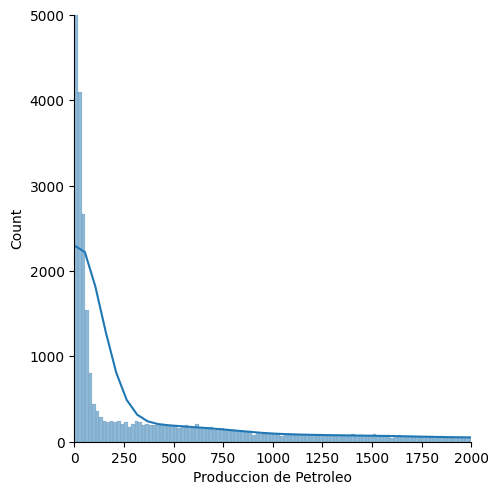

In [ ]:
#El gr√°fico muestra la frecuencia de los valores de producci√≥n de petroleo, se puede observar que los datos estan sesgados
sns.displot(prod_ypf['Produccion de Petroleo'], kde=True)
sns.despine()

# Ajustar los l√≠mites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 5000])

(0.0, 4000.0)

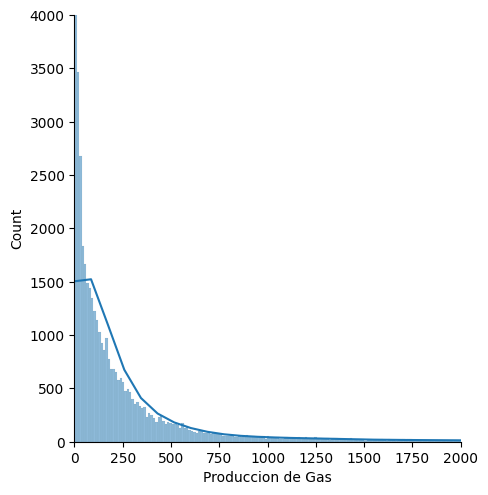

In [ ]:
#El gr√°fico muestra la frecuencia de los valores de producci√≥n de gas, se puede observar que los datos estan sesgados
sns.displot(prod_ypf['Produccion de Gas'], kde=True)
sns.despine()

# Ajustar los l√≠mites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])

# Transformaci√≥n Logar√≠tmica // Estandarizaci√≥n // Normalizaci√≥n Min-Max



*   Transformaci√≥n logar√≠tmica (reduce la asimetr√≠a)
*   Estandarizaci√≥n (centra los datos en media 0 y desviaci√≥n est√°dar 1
*   Normalizaci√≥n (escalamos los datos entre un rango fijo - entre 0 y 1


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Logar√≠tmica (este caso reduce la asimetr√≠a en distribuciones muy sesgadas, se utiliza para reducir el impacto de valores extremos. Es ideal antes de estandarizar cuando los datos est√°n muy sesgados)
prod_ypf['petroleo_log'] = np.log1p(prod_ypf['Produccion de Petroleo']*1000)
prod_ypf['gas_log'] = np.log1p(prod_ypf['Produccion de Gas']*1000)

# Estandarizaci√≥n (centra los datos en media 0 y desviaci√≥n estandar 1, resiste m√°s los outliers que el min max scaler)
std_scaler = StandardScaler()
prod_ypf['petroleo_std'] = std_scaler.fit_transform(prod_ypf[['Produccion de Petroleo']])
prod_ypf['gas_std'] = std_scaler.fit_transform(prod_ypf[['Produccion de Gas']])

# Normalizaci√≥n (escala los datos entre un rango fijo, normalmente entre 0 y 1)
# para este caso no es aconsejable porque el dataset tiene outliers extremos, los comprime todos al m√≠nimo. En s√≠ sirve para datos que est√°n en un rango cerrado sin muchos outliers)
minmax_scaler = MinMaxScaler()
prod_ypf['petroleo_minmax'] = minmax_scaler.fit_transform(prod_ypf[['Produccion de Petroleo']])
prod_ypf['gas_minmax'] = minmax_scaler.fit_transform(prod_ypf[['Produccion de Gas']])

El gr√°fico presenta c√≥mo se comporta la distribuci√≥n de la producci√≥n de petr√≥leo en su forma original y bajo distintas transformaciones estad√≠sticas. En la vista original (arriba izquierda), se observa una distribuci√≥n extremadamente sesgada hacia la derecha, con una gran concentraci√≥n de valores bajos y unos pocos muy altos, lo cual es t√≠pico de datos de producci√≥n con alta variabilidad entre yacimientos o pozos.

Para tratar esta asimetr√≠a, se aplican diferentes transformaciones:

üîπ Transformaci√≥n Logar√≠tmica (arriba derecha): aplana la cola de la distribuci√≥n, haciendo que los datos se distribuyan de forma m√°s homog√©nea y acerc√°ndose a una forma m√°s sim√©trica. Esta t√©cnica es √∫til cuando se quiere suavizar el impacto de valores extremos.

üî∏ Estandarizaci√≥n (StandardScaler) (abajo izquierda): convierte los datos a una escala centrada en cero con desviaci√≥n est√°ndar uno. Aunque no cambia la forma de la distribuci√≥n, permite comparar con otras variables estandarizadas en modelos de machine learning.

üü£ Normalizaci√≥n Min-Max (abajo derecha): transforma los valores a un rango entre 0 y 1. Este m√©todo es √∫til cuando los algoritmos de ML requieren escalas similares, aunque no soluciona el sesgo de la distribuci√≥n.

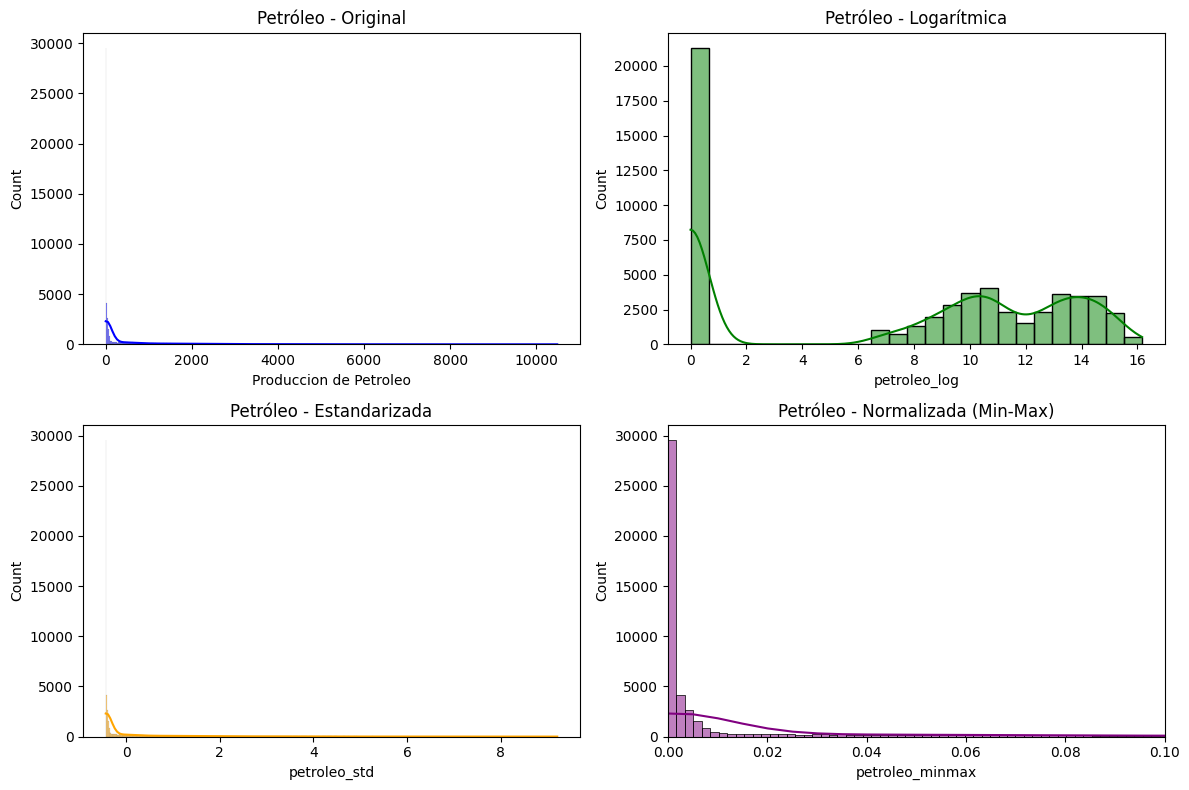

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(prod_ypf['Produccion de Petroleo'], kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title("Petr√≥leo - Original")

sns.histplot(prod_ypf['petroleo_log'], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title("Petr√≥leo - Logar√≠tmica")
plt.xlim(0, 0.1)  # o probar con 0.2 o 0.05 seg√∫n el rango real

sns.histplot(prod_ypf['petroleo_std'], kde=True, ax=axes[1,0], color='orange')
axes[1,0].set_title("Petr√≥leo - Estandarizada")

sns.histplot(prod_ypf['petroleo_minmax'], kde=True, ax=axes[1,1], color='purple')
axes[1,1].set_title("Petr√≥leo - Normalizada (Min-Max)")
plt.xlim(0, 0.1)  # ya aplicado ‚Äî podr√≠as probar 0.05 para m√°s detalle

plt.tight_layout()
plt.show()

La producci√≥n de gas muestra una distribuci√≥n muy sesgada que puede afectar negativamente el rendimiento de modelos predictivos. La transformaci√≥n logar√≠tmica es la m√°s efectiva para reducir la asimetr√≠a y mejorar la calidad de los datos para an√°lisis posteriores. Las transformaciones por estandarizaci√≥n y min-max son √∫tiles para escalar, pero no abordan la distorsi√≥n en la forma de la distribuci√≥n.

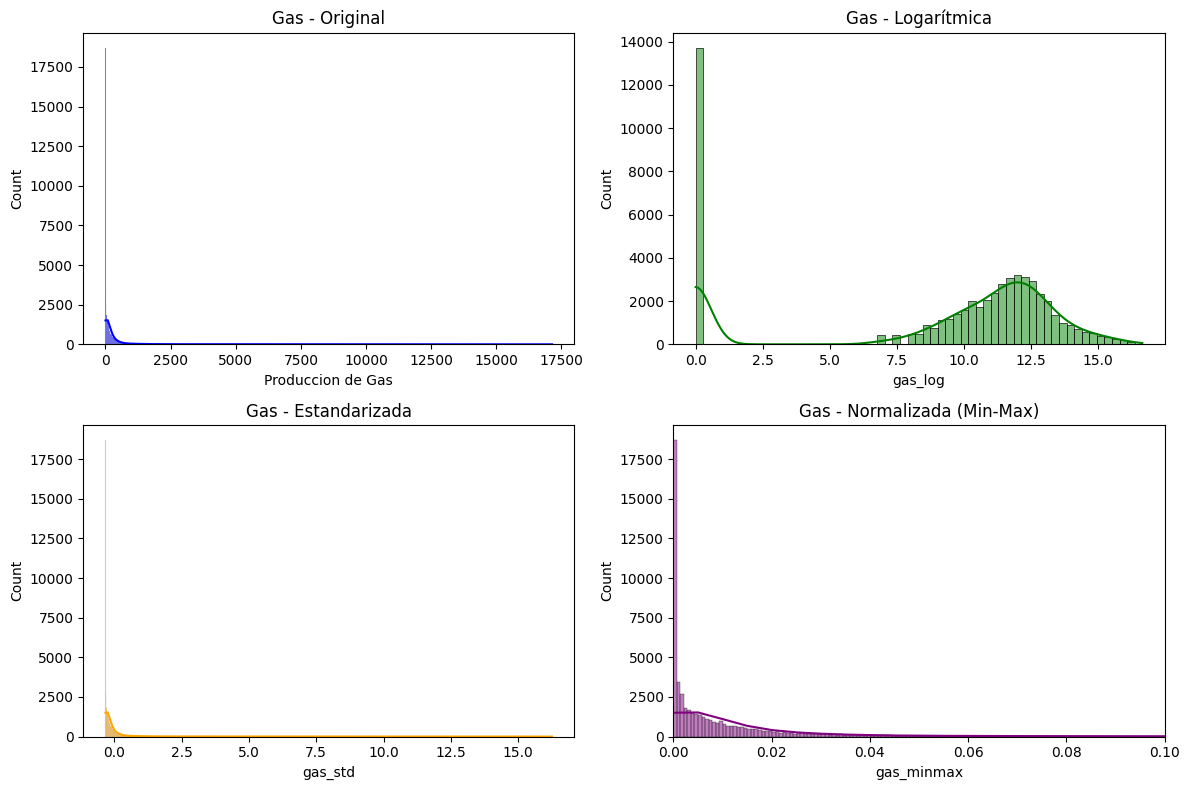

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(prod_ypf['Produccion de Gas'], kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title("Gas - Original")

sns.histplot(prod_ypf['gas_log'], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title("Gas - Logar√≠tmica")
plt.xlim(0, 0.1)  # o probar con 0.2 o 0.05 seg√∫n el rango real

sns.histplot(prod_ypf['gas_std'], kde=True, ax=axes[1,0], color='orange')
axes[1,0].set_title("Gas - Estandarizada")

sns.histplot(prod_ypf['gas_minmax'], kde=True, ax=axes[1,1], color='purple')
axes[1,1].set_title("Gas - Normalizada (Min-Max)")
plt.xlim(0, 0.1)  # ya aplicado ‚Äî podr√≠as probar 0.05 para m√°s detalle

plt.tight_layout()
plt.show()

### **Z-Score**

In [ ]:
#Se probo realizar el Z-core como herramienta para evaluar los outliers, pero no se obtuvo resultados. Si bien intentamos encontrar el conflicto no obtuvimos un resultado positivo.
z = stats.zscore(np.array(prod_ypf['Produccion de Petroleo']))

In [ ]:
threshold = 500

In [ ]:
z_index = prod_ypf['Produccion de Petroleo'][np.abs(z) < threshold].index
prod_ypf_withzscore = prod_ypf.loc[z_index]

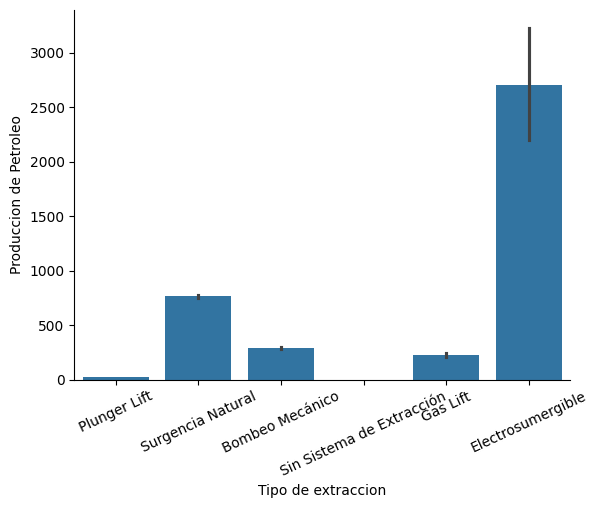

In [ ]:
sns.barplot(x='Tipo de extraccion',y='Produccion de Petroleo',data= prod_ypf_withzscore)
plt.xticks(rotation=25)
sns.despine()

### **Rango Intercuart√≠lico**

In [ ]:
#Rango Intercuartilicos
q1 = prod_ypf['Produccion de Petroleo'].quantile(0.25)
q3 = prod_ypf['Produccion de Petroleo'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
bf = prod_ypf[(prod_ypf['Produccion de Petroleo'] > lb) & (prod_ypf['Produccion de Petroleo'] < ub)]

In [ ]:
bf.reset_index(drop=True, inplace=True)

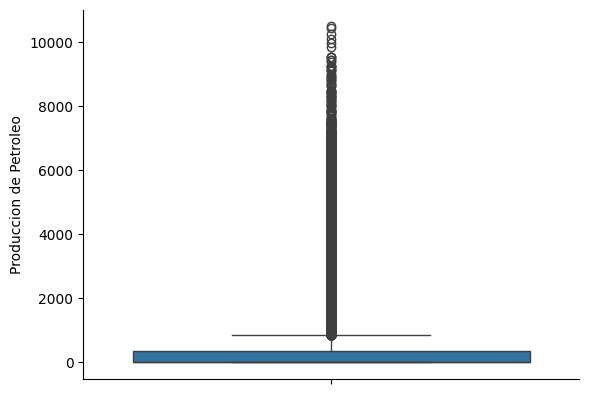

In [ ]:
sns.boxplot(prod_ypf['Produccion de Petroleo'])
sns.despine()

# Transformaci√≥n de variables

In [ ]:
prod_ypf.head(15)

A√±o  Mes  ID pozo  Produccion de Petroleo  Produccion de Gas  \
8572  2025    1   153522                      32                172   
8578  2025    1   156742                       0                  0   
8584  2025    1   156744                       0                  0   
8590  2025    1   155827                       0                  0   
8596  2025    1   156756                      55                  3   
8602  2025    1   159026                       0                  0   
8608  2025    1   161951                    1009                178   
8614  2025    1   137233                       0                  0   
8620  2025    1   153596                      10                 22   
8626  2025    1   158892                     656                188   
8632  2025    1   158891                       0               3243   
8638  2025    1   153595                       7                 20   
8644  2025    1   155411                      32                 13   
8650  2025    1   158901                      18                720   
8656  2025    1   159025                       0                182   

      Produccion de agua         Tipo de extraccion           Tipo de estado  \
8572                   0               Plunger Lift      Extracci√≥n Efectiva   
8578                   0          Surgencia Natural               Abandonado   
8584                   0            Bombeo Mec√°nico               En Estudio   
8590                   0          Surgencia Natural               Abandonado   
8596                   0          Surgencia Natural      Extracci√≥n Efectiva   
8602                   0            Bombeo Mec√°nico  Parado Transitoriamente   
8608                 204          Surgencia Natural      Extracci√≥n Efectiva   
8614                   0  Sin Sistema de Extracci√≥n  En Espera de Reparaci√≥n   
8620                   4               Plunger Lift      Extracci√≥n Efectiva   
8626                  68          Surgencia Natural      Extracci√≥n Efectiva   
8632                 359          Surgencia Natural      Extracci√≥n Efectiva   
8638                   4               Plunger Lift      Extracci√≥n Efectiva   
8644                  21               Plunger Lift      Extracci√≥n Efectiva   
8650                   0          Surgencia Natural      Extracci√≥n Efectiva   
8656                  61          Surgencia Natural      Extracci√≥n Efectiva   

     Tipo de pozo   Empresa  ...      Proyecto Clasificacion Subclasificacion  \
8572     Gas√≠fero  YPF S.A.  ...      GAS PLUS   EXPLOTACION       DESARROLLO   
8578    Otro tipo  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8584    Otro tipo  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8590    Otro tipo  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8596  Petrol√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8602  Petrol√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8608  Petrol√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8614    Otro tipo  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8620  Petrol√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8626  Petrol√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8632     Gas√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8638  Petrol√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8644  Petrol√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8650     Gas√≠fero  YPF S.A.  ...  Sin Proyecto   EXPLOTACION       DESARROLLO   
8656     Gas√≠fero  YPF S.A.  ...      GAS PLUS   EXPLOTACION       DESARROLLO   

     Subtipo de recurso petroleo_log    gas_log  petroleo_std   gas_std  \
8572              TIGHT    10.373522  12.055256     -0.407153 -0.164110   
8578              SHALE     0.000000   0.000000     -0.436570 -0.330572   
8584              SHALE     0.000000   0.

In [ ]:
produccion_agrupada = prod_ypf.groupby(
    ['Area de permiso de concesion', 'Tipo de pozo', 'Tipo de recurso','Subtipo de recurso', 'A√±o', 'Mes'],
    as_index=False
)[['Produccion de Petroleo', 'Produccion de Gas']].sum()

In [ ]:
produccion_agrupada.head(15)

Area de permiso de concesion Tipo de pozo  Tipo de recurso  \
0            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
1            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
2            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
3            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
4            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
5            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
6            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
7            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
8            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
9            AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
10           AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
11           AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
12           AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
13           AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   
14           AGUADA DE LA ARENA     Gas√≠fero  NO CONVENCIONAL   

   Subtipo de recurso   A√±o  Mes  Produccion de Petroleo  Produccion de Gas  
0               SHALE  2023    1                    1219              66440  
1               SHALE  2023    2                    1217              77504  
2               SHALE  2023    3                    1250              95092  
3               SHALE  2023    4                    1096              97896  
4               SHALE  2023    5                    1402             100525  
5               SHALE  2023    6                    1277              96758  
6               SHALE  2023    7                    1400              91667  
7               SHALE  2023    8                    1512              84374  
8               SHALE  2023    9                    1151              58053  
9               SHALE  2023   10                    1459              80977  
10              SHALE  2023   11                    1305              75495  
11              SHALE  2023   12                    1376              96342  
12              SHALE  2024    1                    1141              96029  
13              SHALE  2024    2                     864              74771  
14              SHALE  2024    3                     712              94358

In [ ]:
produccion_agrupada.shape

(1826, 8)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Crear una copia y seleccionar solo las columnas necesarias
produccion_agrupada = produccion_agrupada.copy()
produccion_agrupada = produccion_agrupada[
    ['Produccion de Petroleo','Produccion de Gas', 'Tipo de pozo', 'Tipo de recurso',
     'Subtipo de recurso', 'Area de permiso de concesion','A√±o','Mes']
]

# Especificar las columnas categ√≥ricas
categorical_cols = ['Tipo de pozo',
                    'Tipo de recurso', 'Subtipo de recurso',
                    'Area de permiso de concesion']

# Crear el OneHotEncoder dentro de un ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Transformar los datos
prod_encoded_array = column_transformer.fit_transform(produccion_agrupada)

# Obtener los nombres de las nuevas columnas
encoded_features_names = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_cols)

# Crear el DataFrame con las columnas codificadas y num√©ricas
prod_encoded_df = pd.DataFrame(
    prod_encoded_array,
    columns=list(encoded_features_names) + ['Produccion de Petroleo', 'Produccion de Gas','A√±o','Mes']
)

In [ ]:
prod_encoded_df.head().astype(int)

Tipo de pozo_Gas√≠fero  Tipo de pozo_Inyecci√≥n de Agua  \
0                      1                               0   
1                      1                               0   
2                      1                               0   
3                      1                               0   
4                      1                               0   

   Tipo de pozo_Otro tipo  Tipo de pozo_Petrol√≠fero  Tipo de pozo_Sumidero  \
0                       0                         0                      0   
1                       0                         0                      0   
2                       0                         0                      0   
3                       0                         0                      0   
4                       0                         0                      0   

   Tipo de recurso_NO CONVENCIONAL  Subtipo de recurso_SHALE  \
0                                1                         1   
1                                1                         1   
2                                1                         1   
3                                1                         1   
4                                1                         1   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                         0                                                1   
1                         0                                                1   
2                         0                                                1   
3                         0                                                1   
4                         0                                                1   

   Area de permiso de concesion_AGUADA DEL CHA√ëAR  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   

   Area de permiso de concesion_NARAMBUENA  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Area de permiso de concesion_OCTOGONO  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Area de permiso de concesion_RIO NEUQUEN  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Area de permiso de concesion_VALLE DEL RIO GRANDE  Produccion de Petroleo  \
0                                                  0                    1219   
1                                                  0                    1217   
2                                                  0                    1250   
3                                                  0                    1096   
4                              

In [ ]:
# prompt: descargar copia del dataframe prod_encoded_df

from google.colab import files
prod_encoded_df.to_csv('prod_encoded_df.csv', index=False)
files.download('prod_encoded_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prod_encoded_df.columns

Index(['Tipo de pozo_Gas√≠fero', 'Tipo de pozo_Inyecci√≥n de Agua',
       'Tipo de pozo_Otro tipo', 'Tipo de pozo_Petrol√≠fero',
       'Tipo de pozo_Sumidero', 'Tipo de recurso_NO CONVENCIONAL',
       'Subtipo de recurso_SHALE', 'Subtipo de recurso_TIGHT',
       'Area de permiso de concesion_AGUADA DE LA ARENA',
       'Area de permiso de concesion_AGUADA DEL CHA√ëAR',
       'Area de permiso de concesion_AL NORTE DE LA DORSAL',
       'Area de permiso de concesion_BAJO DEL TORO  ',
       'Area de permiso de concesion_BAJO DEL TORO NORTE',
       'Area de permiso de concesion_BANDURRIA SUR',
       'Area de permiso de concesion_CERRO ARENA ',
       'Area de permiso de concesion_CERRO LAS MINAS ',
       'Area de permiso de concesion_CERRO MANRIQUE',
       'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
       'Area de permiso de concesion_CN VII A',
       'Area de permiso de concesion_DADIN',
       'Area de permiso de concesion_EL OREJANO',
       'Area de permiso 

Re Escalado

En este caso utilizamos MinMaxScaler ya que los datos est√°n dispersos y la distancia entre los mismos es amplia, por lo que podemos dejar los datos dentro de un rango espec√≠fico.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

(0.0, 4000.0)

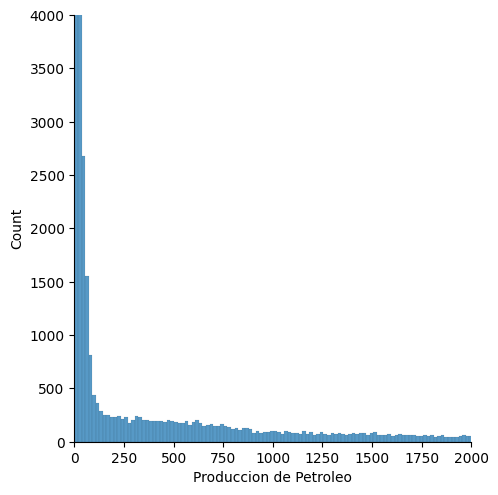

In [ ]:
sns.displot(prod_ypf['Produccion de Petroleo'])

# Ajustar los l√≠mites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])


(0.0, 4000.0)

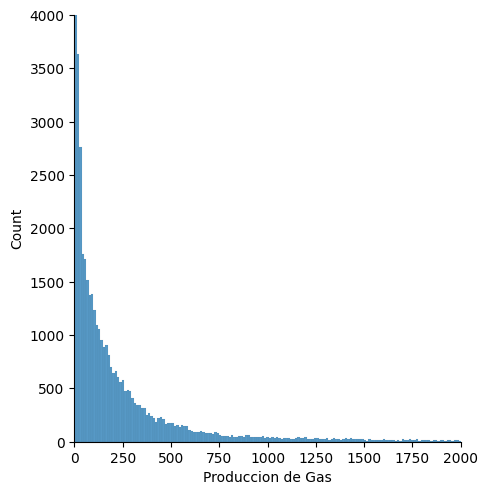

In [ ]:
sns.displot(prod_ypf['Produccion de Gas'])

# Ajustar los l√≠mites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])


In [ ]:
#El rango que elegimos va de 0 a 40 ya que consideramos que es la m√°xima escala para nuestras categor√≠as seg√∫n las features utilizadas.
scaler = MinMaxScaler(feature_range=(0, 40), copy=True)

In [ ]:
prod_ypf['Produccion de Petroleo'] = scaler.fit_transform(prod_ypf[['Produccion de Petroleo']])

In [ ]:
prod_ypf.head(15)

A√±o  ID pozo  Produccion de Petroleo  Produccion de Gas  \
8572  2025   153522                0.123135             172.10   
8578  2025   156742                0.000000               0.00   
8584  2025   156744                0.000000               0.00   
8590  2025   155827                0.000000               0.00   
8596  2025   156756                0.213514               3.37   
8602  2025   159026                0.000000               0.00   
8608  2025   161951                3.850910             178.68   
8614  2025   137233                0.000000               0.00   
8620  2025   153596                0.039812              22.34   
8626  2025   158892                2.504047             188.55   
8632  2025   158891                0.000000            3243.24   
8638  2025   153595                0.027266              20.62   
8644  2025   155411                0.125767              13.74   
8650  2025   158901                0.070815             720.84   
8656  2025   159025                0.002250             182.96   

      Produccion de agua Tipo de extraccion Tipo de estado Tipo de pozo  \
8572                0.00                  3              9            0   
8578                0.00                  5              1            2   
8584                0.00                  0              4            2   
8590                0.00                  5              1            2   
8596                0.00                  5              9            3   
8602                0.00                  0             14            3   
8608              204.18                  5              9            3   
8614                0.00                  4              3            2   
8620                4.04                  3              9            3   
8626               68.97                  5              9            3   
8632              359.31                  5              9            0   
8638                4.97                  3              9            3   
8644               21.76                  3              9            3   
8650                0.00                  5              9            0   
8656               61.55                  5              9            0   

       Empresa  Profundidad  ... areayacimiento    Cuenca  Provincia  \
8572  YPF S.A.       3844.0  ...             18  NEUQUINA  Rio Negro   
8578  YPF S.A.       2827.0  ...             16  NEUQUINA    Neuqu√©n   
8584  YPF S.A.       2977.0  ...             22  NEUQUINA    Neuqu√©n   
8590  YPF S.A.       4092.0  ...             16  NEUQUINA    Neuqu√©n   
8596  YPF S.A.       4945.0  ...             30  NEUQUINA    Neuqu√©n   
8602  YPF S.A.       4902.0  ...             22  NEUQUINA    Neuqu√©n   
8608  YPF S.A.       6096.0  ...             22  NEUQUINA    Neuqu√©n   
8614  YPF S.A.       2352.0  ...             36  NEUQUINA    Mendoza   
8620  YPF S.A.       3069.0  ...             31  NEUQUINA    Neuqu√©n   
8626  YPF S.A.       5065.0  ...              3  NEUQUINA    Neuqu√©n   
8632  YPF S.A.       5489.0  ...             16  NEUQUINA    Neuqu√©n   
8638  YPF S.A.       3155.0  ...             31  NEUQUINA    Neuqu√©n   
8644  YPF S.A.       3075.0  ...             31  NEUQUINA    Neuqu√©n   
8650  YPF S.A.       3900.0  ...             42  NEUQUINA    Neuqu√©n   
8656  YPF S.A.       3252.0  ...              6  NEUQUINA    Neuqu√©n   

     coordenadax  coordenaday  Tipo de recurso      Proyecto Clasificacion  \
8572  -67.810843   -39.024083                0      GAS PLUS   EXPLOTACION   
8578  -69.179098   -38.009987                0  Sin Proyecto   EXPLOTACION   
8584  -68.748543   -38.176774                0  Sin Proyecto   EXPLOTACION   
8590  -69.200359   -37.958765                0  Sin Proyecto   EXPLOTACION   
8596  -68.678007   -38.329983                0  Sin Proyecto   EXPLOTACION   
8602  -68.748658   -38.176370                0  Sin Proyecto   EXPLOTACION   
8608  -68.654683   -38.278314       

In [ ]:
prod_ypf['Produccion de Petroleo'].describe()

count    56418.000000
mean         1.812248
std          4.148629
min          0.000000
25%          0.000000
50%          0.052396
75%          1.312152
max         40.000000
Name: Produccion de Petroleo, dtype: float64

(0.0, 200.0)

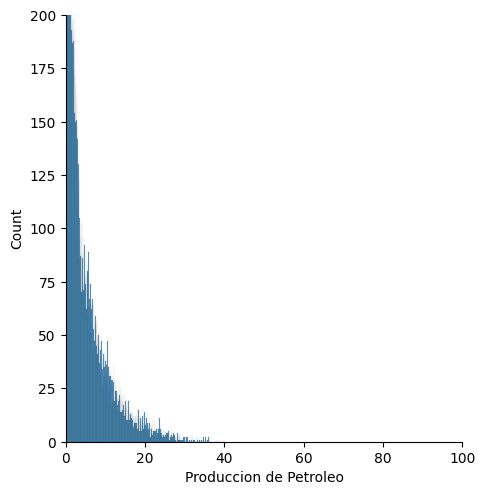

In [ ]:
sns.displot(prod_ypf['Produccion de Petroleo'])

# Ajustar los l√≠mites de los ejes
plt.xlim([0, 100])
plt.ylim([0, 200])

In [ ]:
#El rango que elegimos va de 0 a 40 ya que consideramos que es la m√°xima escala para nuestras categor√≠as seg√∫n las features utilizadas.
scaler = MinMaxScaler(feature_range=(0, 40), copy=True)

In [ ]:
prod_ypf['Produccion de Gas'] = scaler.fit_transform(prod_ypf[['Produccion de Gas']])

In [ ]:
prod_ypf.head(15)

A√±o  ID pozo  Produccion de Petroleo  Produccion de Gas  \
8572  2025   153522                0.123135           0.401562   
8578  2025   156742                0.000000           0.000000   
8584  2025   156744                0.000000           0.000000   
8590  2025   155827                0.000000           0.000000   
8596  2025   156756                0.213514           0.007863   
8602  2025   159026                0.000000           0.000000   
8608  2025   161951                3.850910           0.416915   
8614  2025   137233                0.000000           0.000000   
8620  2025   153596                0.039812           0.052126   
8626  2025   158892                2.504047           0.439945   
8632  2025   158891                0.000000           7.567466   
8638  2025   153595                0.027266           0.048113   
8644  2025   155411                0.125767           0.032060   
8650  2025   158901                0.070815           1.681939   
8656  2025   159025                0.002250           0.426901   

      Produccion de agua Tipo de extraccion Tipo de estado Tipo de pozo  \
8572                0.00                  3              9            0   
8578                0.00                  5              1            2   
8584                0.00                  0              4            2   
8590                0.00                  5              1            2   
8596                0.00                  5              9            3   
8602                0.00                  0             14            3   
8608              204.18                  5              9            3   
8614                0.00                  4              3            2   
8620                4.04                  3              9            3   
8626               68.97                  5              9            3   
8632              359.31                  5              9            0   
8638                4.97                  3              9            3   
8644               21.76                  3              9            3   
8650                0.00                  5              9            0   
8656               61.55                  5              9            0   

       Empresa  Profundidad  ... areayacimiento    Cuenca  Provincia  \
8572  YPF S.A.       3844.0  ...             18  NEUQUINA  Rio Negro   
8578  YPF S.A.       2827.0  ...             16  NEUQUINA    Neuqu√©n   
8584  YPF S.A.       2977.0  ...             22  NEUQUINA    Neuqu√©n   
8590  YPF S.A.       4092.0  ...             16  NEUQUINA    Neuqu√©n   
8596  YPF S.A.       4945.0  ...             30  NEUQUINA    Neuqu√©n   
8602  YPF S.A.       4902.0  ...             22  NEUQUINA    Neuqu√©n   
8608  YPF S.A.       6096.0  ...             22  NEUQUINA    Neuqu√©n   
8614  YPF S.A.       2352.0  ...             36  NEUQUINA    Mendoza   
8620  YPF S.A.       3069.0  ...             31  NEUQUINA    Neuqu√©n   
8626  YPF S.A.       5065.0  ...              3  NEUQUINA    Neuqu√©n   
8632  YPF S.A.       5489.0  ...             16  NEUQUINA    Neuqu√©n   
8638  YPF S.A.       3155.0  ...             31  NEUQUINA    Neuqu√©n   
8644  YPF S.A.       3075.0  ...             31  NEUQUINA    Neuqu√©n   
8650  YPF S.A.       3900.0  ...             42  NEUQUINA    Neuqu√©n   
8656  YPF S.A.       3252.0  ...              6  NEUQUINA    Neuqu√©n   

     coordenadax  coordenaday  Tipo de recurso      Proyecto Clasificacion  \
8572  -67.810843   -39.024083                0      GAS PLUS   EXPLOTACION   
8578  -69.179098   -38.009987                0  Sin Proyecto   EXPLOTACION   
8584  -68.748543   -38.176774                0  Sin Proyecto   EXPLOTACION   
8590  -69.200359   -37.958765                0  Sin Proyecto   EXPLOTACION   
8596  -68.678007   -38.329983                0  Sin Proyecto   EXPLOTACION   
8602  -68.748658   -38.176370                0  Sin Proyecto   EXPLOTACION   
8608  -68.654683   -38.278314       

In [ ]:
prod_ypf['Produccion de Gas'].describe()

count    56418.000000
mean         0.797867
std          2.411041
min          0.000000
25%          0.004037
50%          0.141900
75%          0.553821
max         40.000000
Name: Produccion de Gas, dtype: float64

(0.0, 200.0)

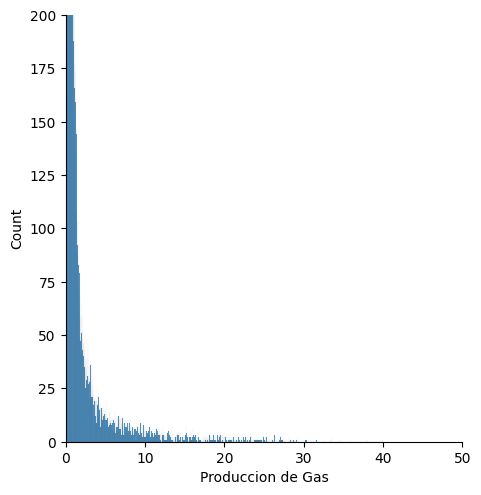

In [ ]:
sns.displot(prod_ypf['Produccion de Gas'])

# Ajustar los l√≠mites de los ejes
plt.xlim([0, 50])
plt.ylim([0, 200])

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Asegurate que las coordenadas est√©n en float y no tengan NaN
prod_ypf_clean = prod_ypf.dropna(subset=['coordenadax', 'coordenaday']).copy()

# Crear geometr√≠a (Point)
geometry = [Point(xy) for xy in zip(prod_ypf_clean['coordenadax'], prod_ypf_clean['coordenaday'])]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(prod_ypf_clean, geometry=geometry)

# Definir sistema de coordenadas (CRS)
# Si las coordenadas est√°n en WGS84 (lat/lon), us√° EPSG:4326
# Si est√°n en metros, por ejemplo UTM zona 20 sur: EPSG:32720
gdf.set_crs(epsg=4326, inplace=True)  # ‚Üê Ajust√° si corresponde

A√±o  ID pozo  Produccion de Petroleo  Produccion de Gas  \
8572    2025   153522                      32                172   
8578    2025   156742                       0                  0   
8584    2025   156744                       0                  0   
8590    2025   155827                       0                  0   
8596    2025   156756                      55                  3   
...      ...      ...                     ...                ...   
199438  2024   166128                       0                  0   
199440  2024   166126                    1642                101   
199442  2024   166127                    2441                153   
199446  2024   166133                       0                  0   
199448  2024   166134                       0                  0   

        Produccion de agua         Tipo de extraccion  \
8572                     0               Plunger Lift   
8578                     0          Surgencia Natural   
8584                     0            Bombeo Mec√°nico   
8590                     0          Surgencia Natural   
8596                     0          Surgencia Natural   
...                    ...                        ...   
199438                   0  Sin Sistema de Extracci√≥n   
199440                1102          Surgencia Natural   
199442                1287          Surgencia Natural   
199446                   0          Surgencia Natural   
199448                   0          Surgencia Natural   

                 Tipo de estado Tipo de pozo   Empresa  Profundidad  ...  \
8572        Extracci√≥n Efectiva     Gas√≠fero  YPF S.A.         3844  ...   
8578                 Abandonado    Otro tipo  YPF S.A.         2827  ...   
8584                 En Estudio    Otro tipo  YPF S.A.         2977  ...   
8590                 Abandonado    Otro tipo  YPF S.A.         4092  ...   
8596        Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.         4945  ...   
...                         ...          ...       ...          ...  ...   
199438    En Inyecci√≥n Efectiva     Sumidero  YPF S.A.         2046  ...   
199440      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.         5889  ...   
199442      Extracci√≥n Efectiva  Petrol√≠fero  YPF S.A.            0  ...   
199446  Parado Transitoriamente     Gas√≠fero  YPF S.A.         4491  ...   
199448  Parado Transitoriamente     Gas√≠fero  YPF S.A.         4455  ...   

          Cuenca  Provincia coordenadax coordenaday  Tipo de recurso  \
8572    NEUQUINA  Rio Negro  -67.810843  -39.024083  NO CONVENCIONAL   
8578    NEUQUINA    Neuqu√©n  -69.179098  -38.009987  NO CONVENCIONAL   
8584    NEUQUINA    Neuqu√©n  -68.748543  -38.176774  NO CONVENCIONAL   
8590    NEUQUINA    Neuqu√©n  -69.200359  -37.958765  NO CONVENCIONAL   
8596    NEUQUINA    Neuqu√©n  -68.678007  -38.329983  NO CONVENCIONAL   
...          ...        ...         ...         ...              ...   
199438  NEUQUINA    Neuqu√©n  -68.525949  -38.122077  NO CONVENCIONAL   
199440  NEUQUINA    Neuqu√©n  -68.558082  -38.076855  NO CONVENCIONAL   
199442  NEUQUINA    Neuqu√©n  -68.558013  -38.076854  NO CONVENCIONAL   
199446  NEUQUINA    Neuqu√©n  -69.335181  -38.710951  NO CONVENCIONAL   
199448  NEUQUINA    Neuqu√©n  -69.335078  -38.710951  NO CONVENCIONAL   

            Proyecto Clasificacion Subclasificacion Subtipo de recurso  \
8572        GAS PLUS   EXPLOTACION       DESARROLLO              TIGHT   
8578    Sin Proyecto   EXPLOTACION       DESARROLLO              SHALE   
8584    Sin Proyecto   EXPLOTACION       DESARROLLO              SHALE   
8590    Sin Proyecto   EXPLOTACION       DESARROLLO              SHALE   
8596    Sin Proyecto   EXPLOTACION       DESARROLLO              SHALE   
...              ...           ...              ...                ...   
199438  Sin Proyecto      SERVICIO          CONTROL              SHALE   
199440  Sin Proyecto   EXPLOTACION       DESARROLLO              SHALE   
199442  Sin Proyecto   EXPLOTACION      

In [ ]:
!pip install contextily

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22.2/22.2 MB 49.8 MB/s eta 0:00:00


In [ ]:
print(gdf.columns)

Index(['A√±o', 'ID pozo', 'Produccion de Petroleo', 'Produccion de Gas',
       'Produccion de agua', 'Tipo de extraccion', 'Tipo de estado',
       'Tipo de pozo', 'Empresa', 'Profundidad',
       'Area de permiso de concesion', 'areayacimiento', 'Cuenca', 'Provincia',
       'coordenadax', 'coordenaday', 'Tipo de recurso', 'Proyecto',
       'Clasificacion', 'Subclasificacion', 'Subtipo de recurso', 'geometry'],
      dtype='object')


In [ ]:
print(gdf.dtypes)

A√±o                                int64
ID pozo                            int64
Produccion de Petroleo             int64
Produccion de Gas                  int64
Produccion de agua                 int64
Tipo de extraccion                object
Tipo de estado                    object
Tipo de pozo                      object
Empresa                           object
Profundidad                        int64
Area de permiso de concesion      object
areayacimiento                    object
Cuenca                            object
Provincia                         object
coordenadax                      float64
coordenaday                      float64
Tipo de recurso                   object
Proyecto                          object
Clasificacion                     object
Subclasificacion                  object
Subtipo de recurso                object
geometry                        geometry
dtype: object


Los siguientes gr√°ficos permiten visualizar la ubicaci√≥n de la producci√≥n de petr√≥leo y gas por parte de YPF en estos √∫ltimos a√±os en Vaca Muerta, como hab√≠amos mencionado anteriormente la mayor producci√≥n se concentra en el √°rea de yacimiento Loma Campana.

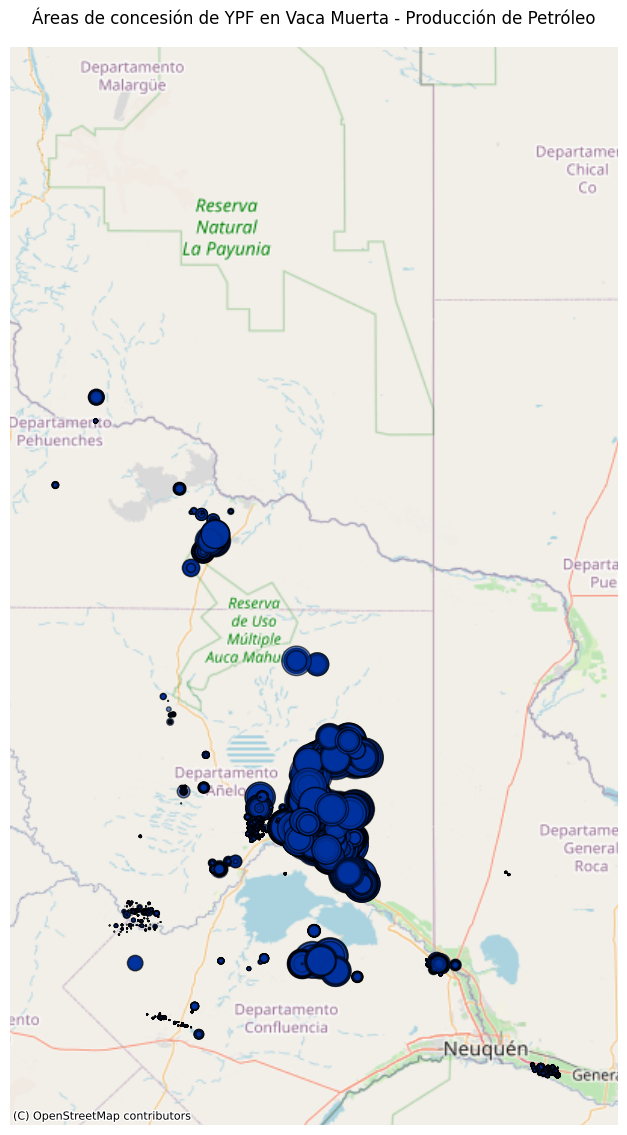

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

# Buscamos reproyectar a Web Mercator (para que se alinee con los mapas base)
# Web Mercator (EPSG:3857) es un sistema de proyecci√≥n cartogr√°fica ampliamente utilizado en mapas web como contextily en Python
gdf = gdf.to_crs(epsg=3857)

# Escalar tama√±o de burbujas
gdf['scaled_area'] = gdf['Produccion de Petroleo'].astype(float)
gdf['scaled_area'] = gdf['scaled_area'] / gdf['scaled_area'].max() * 1000

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

gdf.plot(
    ax=ax,
    markersize=gdf['scaled_area'],
    alpha=0.6,
    color='#0033A0',
    edgecolor='k'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Fondo tipo mapa
ax.set_axis_off()
plt.title('√Åreas de concesi√≥n de YPF en Vaca Muerta - Producci√≥n de Petr√≥leo')
plt.show()

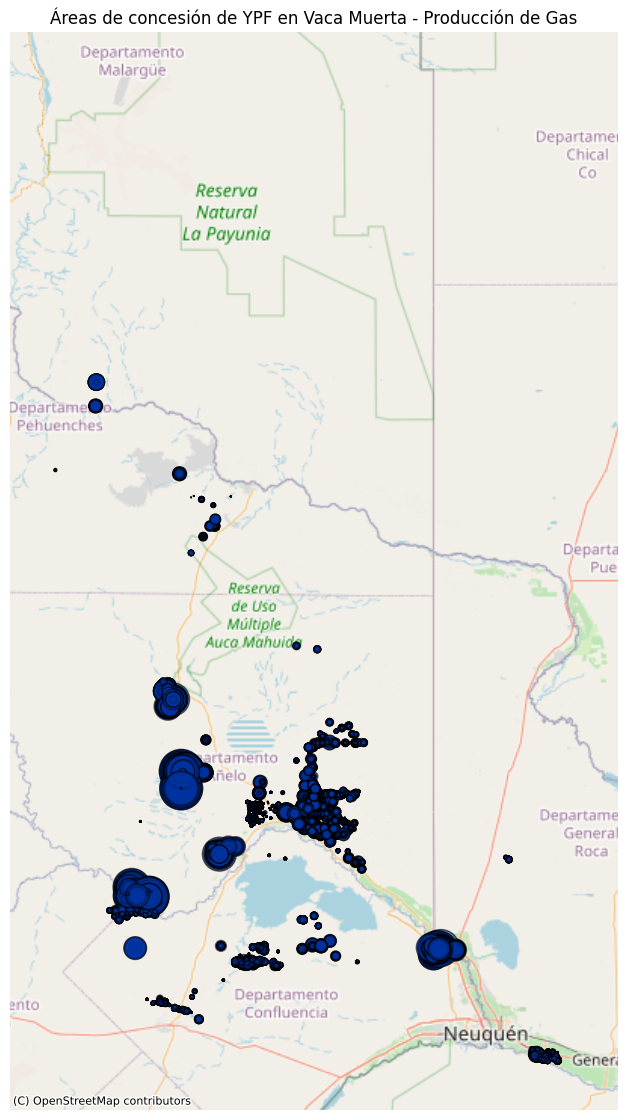

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

# Reproyectar a Web Mercator (para que se alinee con los mapas base)
gdf = gdf.to_crs(epsg=3857)

# Escalar tama√±o de burbujas
gdf['scaled_area'] = gdf['Produccion de Gas'].astype(float)
gdf['scaled_area'] = gdf['scaled_area'] / gdf['scaled_area'].max() * 1000

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

gdf.plot(
    ax=ax,
    markersize=gdf['scaled_area'],
    alpha=0.6,
    color='#0033A0',
    edgecolor='k'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Fondo tipo mapa
ax.set_axis_off()
plt.title('√Åreas de concesi√≥n de YPF en Vaca Muerta - Producci√≥n de Gas')
plt.show()